# Calculating the impact of Swimming Pools on Single family home on Staten Island 

The goal of this project is locating, classifying and assessing the financial impact of swimming pools on Staten Island. The pools are found by using the Normalized Difference Water Index (NDWI) equation that calculates green and Near-infrared light (NIR) to classify bodies of what water with by their reflectance. The pools are then classified into above ground and inground using airborne LIDAR. When the pools are classified, they are geolocated into their tax parcels using cadastral data. Sales and other descriptive information are then appended to the tax parcels. In other communities this information has been use for mosquito control, aquatic saftey along with helping home owners 

## DATA 

The data used in this study comes from the United States Federal Government, New York State, and the City of New York. The aerial imagery is from National Agriculture Imagery Program (NAIP) from the United State Department of Agriculture (USDA).  The LIDAR data is from New York State NYS GIS Clearinghouse. The All of the data is from the City of New York, NYC Department of City Planning(DCP) and NYC Department of Finance(DOF). 

### Remote Sensing and Lidar DATA 

The aerial imagery has four bands Red, Green, Blue, and Near infra-Red. The LIDAR data for the Project is preprocessed into Digital Elevation Models (DEM) and Digital Surface Models (DSM). Both of these data form are provide as .tiff files and are consider rasters. Raster are matrix of cells orgainzed as row are columns that contain information. In this case the NAIP data has reflection information based on the band of light that raster has. The LIDAR rasters have height information the DEM has the lowest return and the DSM has the hightest return.Both of these are senory methods. 

#### NAIP

NAIP is a yearly ortho that is taken during the summer for agricultural purposes by the USDA. This data was downloaded from (https://earthexplorer.usgs.gov/)

#### LIDAR 

The Topographic LIDAR for this project was taken May 3rd, 2017 and May 17th, 2017. The data was taken by Quantum Spatial Inc. USGS standards of 8 pulses/m2. LIDAR is NIR pulse of light shot at the ground from an airplane and are used to judge distance. 

NYC DOTITT DATA Story Map(https://maps.nyc.gov/lidar/2017/)

NY Lidar download portal(https://gis.ny.gov/elevation/lidar-coverage.html)

### Vector DATA 

There needs to be a median to combine the image data from the remote sensing part with the sales information that is tabular data,  The cadaster map City of New York is being used to count the number of pixels within the tax lots. the count of classified pixels determine if there is a pool and how it is classified. 

#### Cadasters

Cadaster show boundaries and ownership of land. The Digital Tax Map(DTM) has every tax lot within New York City and is the unit of measure for administering tax in New York City. The data was downloaded a shapefile from NYC open DATA (https://data.cityofnewyork.us/Housing-Development/Department-of-Finance-Digital-Tax-Map/smk3-tmxj).

#### Primary Land Use Tax Lot Output (PLUTO)

PLUTO is also used in this project to bring in other descriptive infomation that my change the value of real estate. This data was downloaded from DCP Website.(https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page)

### Tabular  

The sales data came in the form of .csv. file formatting from DOF. This data is Appended to the DTM to create the sales maps for 2015 and 2016.

#### Sale Data

All sales of real property are recorded by the New York. This data is then complied and released as the annualized sales roll. This data released by the DOF is located. (https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page)

In [ ]:
# EDITIED 

## DATA Processing 

To the this project the pool data needs to be created. This done by first finding bodies of water using NDWI. Then part of the find the height of that water. To do this Digital Elevation Model (DEM) is subtracted from the Digital Surface Model (DSM).The DEM is the bare earth. The Digital Surface model is the first thing that the light hit like the top of trees or houses. This called the Canopy Height Model (CHM).Subracting them gives the hieght of objects on the ground. You are the same hieght on the beach and on top of a mountain but your elevation changes.   

With the CHS and NDWI they can be overlaid. with each other and then add together using matrix math to classify a new image. 

### Remote Sensed and Lidar 

The process to classify data is similar to both. First the data is importaned. Then the data data is merged to geather in a mosic. That data is then broken into bands. Those bands and then combined together angain in a different way to get the disiard result. 

#### Normalized Difference Water Index (NDWI)

The Normalized Difference Water Index (NDWI) is an index for delineating and monitoring content changes in surface water. The formula for it is NDWI = (Green - NIR) / (Green + NIR). The Green and NIR are bands of light. 

##### Importing NAIP DATA and creating the Mosic

To find the NDWI the first step is to import the tif file for NAIP. After they are import that are merge together into a Mosaic. that Mosaic file is then turned into a tif and then back in a large raster where they are treated as one.  

In [ ]:

#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True
arcpy.env.addOutputsToMap = True 


arcpy.CheckOutExtension("spatial")
arcpy.CheckOutExtension("ImageAnalyst")

### Import Data
m_4007423_se_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007423_se_18_1_20170826\\m_4007423_se_18_1_20170826.tif")
m_4007423_sw_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007423_sw_18_1_20170826\\m_4007423_sw_18_1_20170826.tif")
m_4007424_se_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007424_se_18_1_20170826\\m_4007424_se_18_1_20170826.tif")
m_4007424_sw_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007424_sw_18_1_20170826\\m_4007424_sw_18_1_20170826.tif")
m_4007430_se_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007430_se_18_1_20170826\\m_4007430_se_18_1_20170826.tif")
m_4007431_ne_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_ne_18_1_20170826\\m_4007431_ne_18_1_20170826.tif")
m_4007431_nw_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_nw_18_1_20170826\\m_4007431_nw_18_1_20170826.tif")
m_4007431_se_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_se_18_1_20170826\\m_4007431_se_18_1_20170826.tif")
m_4007431_sw_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_sw_18_1_20170826\\m_4007431_sw_18_1_20170826.tif")
m_4007432_ne_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_ne_18_1_20170826\\m_4007432_ne_18_1_20170826.tif")
m_4007432_nw_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_nw_18_1_20170826\\m_4007432_nw_18_1_20170826.tif")
m_4007432_sw_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_sw_18_1_20170826\\m_4007432_sw_18_1_20170826.tif")
m_4007438_ne_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007438_ne_18_1_20170826\\m_4007438_ne_18_1_20170826.tif")
m_4007439_nw_18_1_20170826_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007439_nw_18_1_20170826\\m_4007439_nw_18_1_20170826.tif")

#Output location
output = (r'D:\SwimmingPoolProject\data\output112620')

##Merging the Tif
NAIP6_tif = arcpy.management.MosaicToNewRaster(input_rasters=[m_4007423_se_18_1_20170826_tif, m_4007423_sw_18_1_20170826_tif, m_4007424_se_18_1_20170826_tif, m_4007424_sw_18_1_20170826_tif, m_4007430_se_18_1_20170826_tif, m_4007431_ne_18_1_20170826_tif, m_4007431_nw_18_1_20170826_tif, m_4007431_se_18_1_20170826_tif, m_4007431_sw_18_1_20170826_tif, m_4007432_ne_18_1_20170826_tif, m_4007432_nw_18_1_20170826_tif, m_4007432_sw_18_1_20170826_tif, m_4007438_ne_18_1_20170826_tif, m_4007439_nw_18_1_20170826_tif], output_location=output, raster_dataset_name_with_extension="NAIP7.tif", coordinate_system_for_the_raster="PROJCS['WGS_1984_Web_Mercator_Auxiliary_Sphere',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Mercator_Auxiliary_Sphere'],PARAMETER['False_Easting',0.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',0.0],PARAMETER['Standard_Parallel_1',0.0],PARAMETER['Auxiliary_Sphere_Type',0.0],UNIT['Meter',1.0]]", pixel_type="64_BIT", cellsize=None, number_of_bands=4, mosaic_method="LAST", mosaic_colormap_mode="FIRST")[0]

#Make it a tif
NAIP5_tif = arcpy.Raster(NAIP7_tif)

# Process: Make Raster Layer (Make Raster Layer) (management)
NAIP_Band2 = "NAIP_Band2"
arcpy.management.MakeRasterLayer(in_raster=NAIP5_tif, out_rasterlayer=NAIP_Band2, where_clause="", envelope="-8272969.20377966 4928992.64155044 -8237034.20377966 4967091.64155044", band_index=[2])


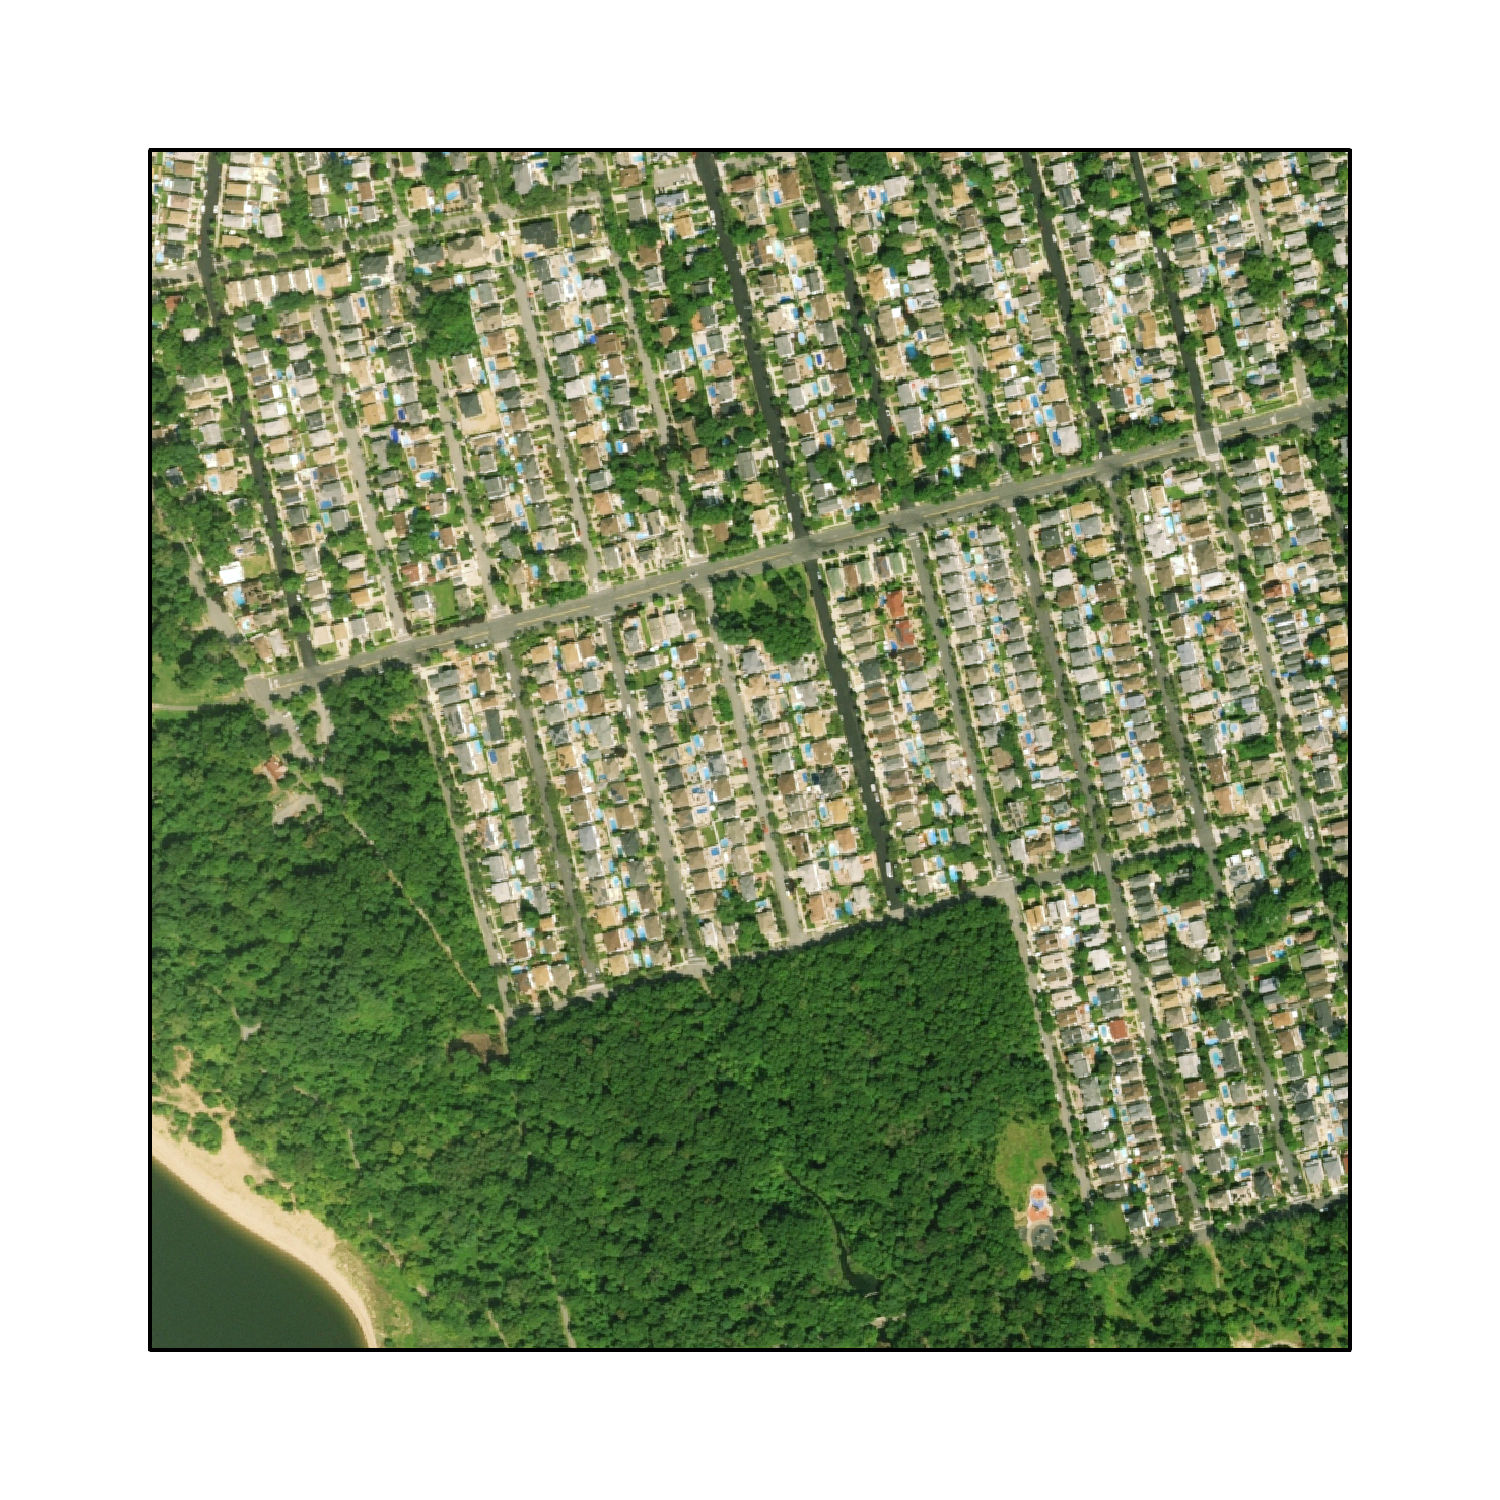

##### Processing the Bands 

the raster that was band had four band like the starting tif. In order to do NDWI the process only needs band 2 (Green) and band 4 (NIR). After this band are extracted they are turned into tif with just one band. 

In [ ]:

#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True
output = (r'D:\SwimmingPoolProject\data\output112620')

#Make it a tif
NAIP5_tif = arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\NAIP6.tif')

###Band 2
# Process: Make Raster Layer
NAIP_Band2 = "NAIP_Band2"
arcpy.management.MakeRasterLayer(in_raster=NAIP5_tif, out_rasterlayer=NAIP_Band2, where_clause="", envelope="-8272969.20377966 4928992.64155044 -8237034.20377966 4967091.64155044", band_index=[2])

# Process: Composite Bands
Band_2 = arcpy.management.CompositeBands(in_rasters=NAIP_Band2, out_raster= (r'D:\SwimmingPoolProject\data\output112620\Band_2.tif'))
Band_2_r = arcpy.Raster(Band_2)

###Band 4
# Process: Make Raster Layer
NAIP_Band4 = "NAIP_Band4"
arcpy.management.MakeRasterLayer(in_raster=NAIP5_tif, out_rasterlayer=NAIP_Band4, where_clause="", envelope="-8272969.20377966 4928992.64155044 -8237034.20377966 4967091.64155044", band_index=[4])

# Process: Composite Bands
Band_4 = arcpy.management.CompositeBands(in_rasters=NAIP_Band4 , out_raster= (r'D:\SwimmingPoolProject\data\output112620\Band_4.tif'))
Band_4_r = arcpy.Raster(Band_4)


###### Band 2 - GREEN 

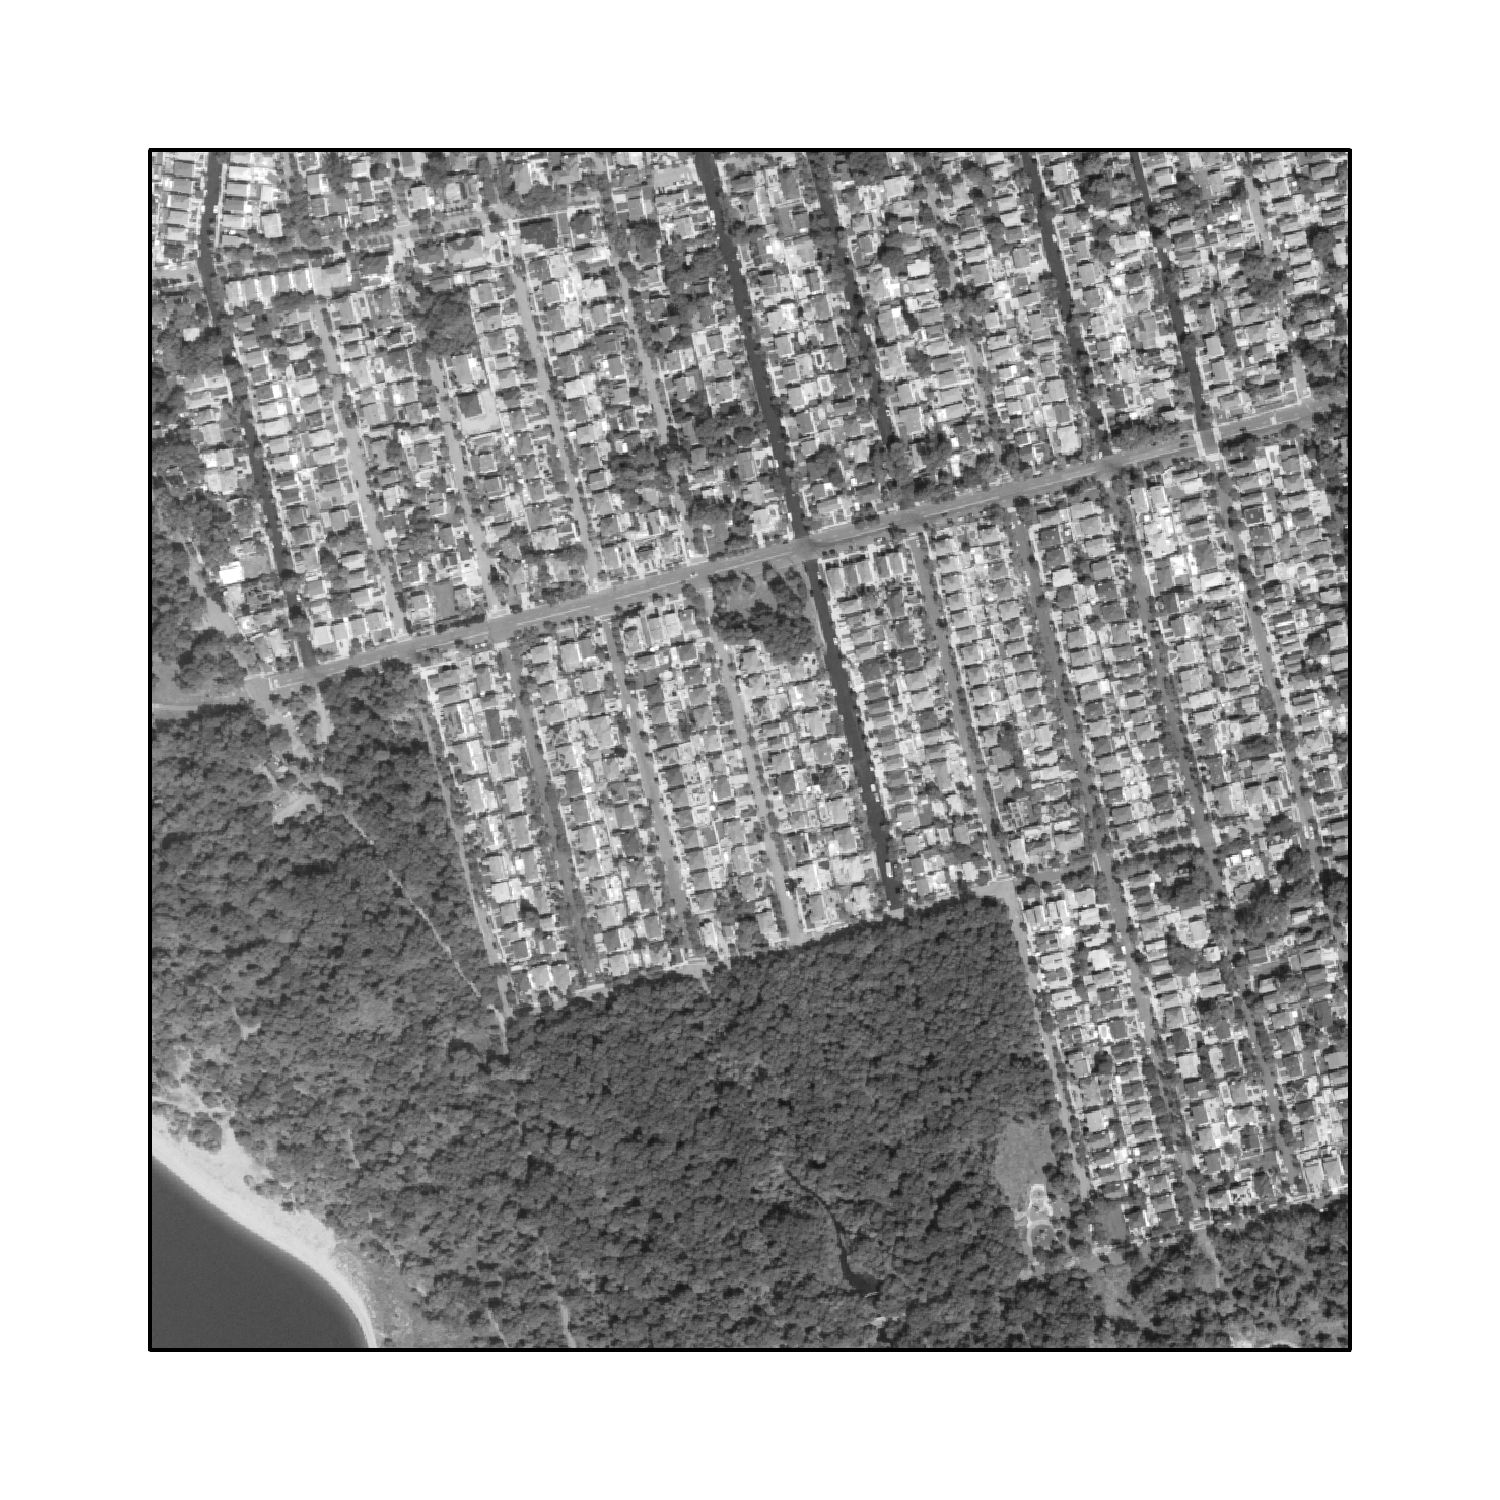

In [ ]:
##### Band 4 - NIR 

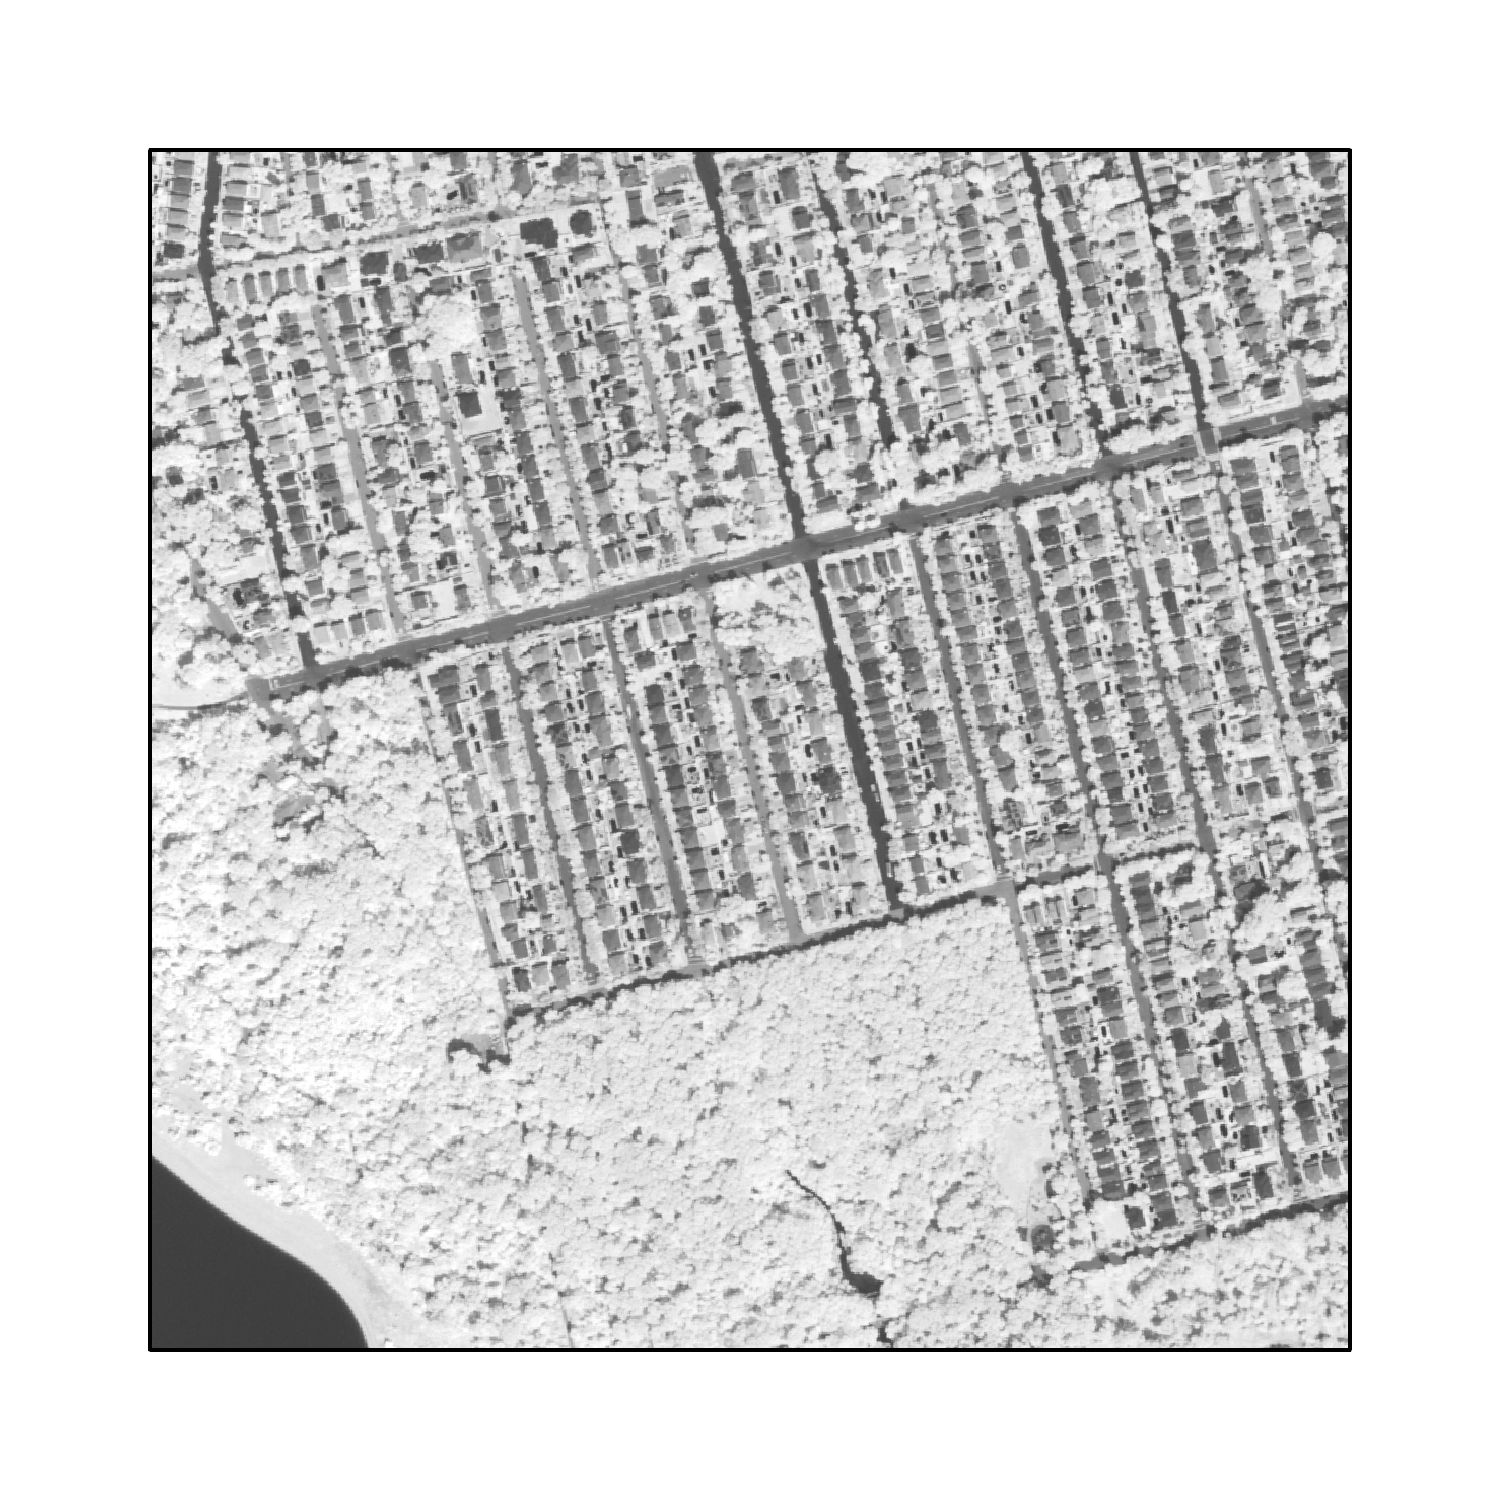

##### Band Math and NDWI 

The Next step is to combine the bands at the pixel level. This is done by dividing the differnce of band 2 and band by the sum of band 2 and band 4. This give and out between -1 and 1 with 1 beening most likly water. 


In [ ]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy
from arcpy.sa import *

#Env control
arcpy.env.overwriteOutput = True

#Output
output = (r'D:\SwimmingPoolProject\data\output112620')

#Input
Band2 = arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\Band_2.tif')
Band4 = arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\Band_4.tif')

#NDWI = (Band2 - Band4) / Band2 + Band4)
NDWI = (Raster(Band2) - Raster(Band4)) /(Raster(Band2) + Raster(Band4))

#Export Raster 
arcpy.management.CopyRaster(in_raster=NDWI, out_rasterdataset=(r'D:\SwimmingPoolProject\data\output112620\NDWI.tif'), config_keyword="", background_value=None, nodata_value="256", onebit_to_eightbit="NONE", colormap_to_RGB="NONE", pixel_type="", scale_pixel_value="NONE", RGB_to_Colormap="NONE", format="TIFF", transform="NONE", process_as_multidimensional="CURRENT_SLICE", build_multidimensional_transpose="NO_TRANSPOSE")


###### NDWI 

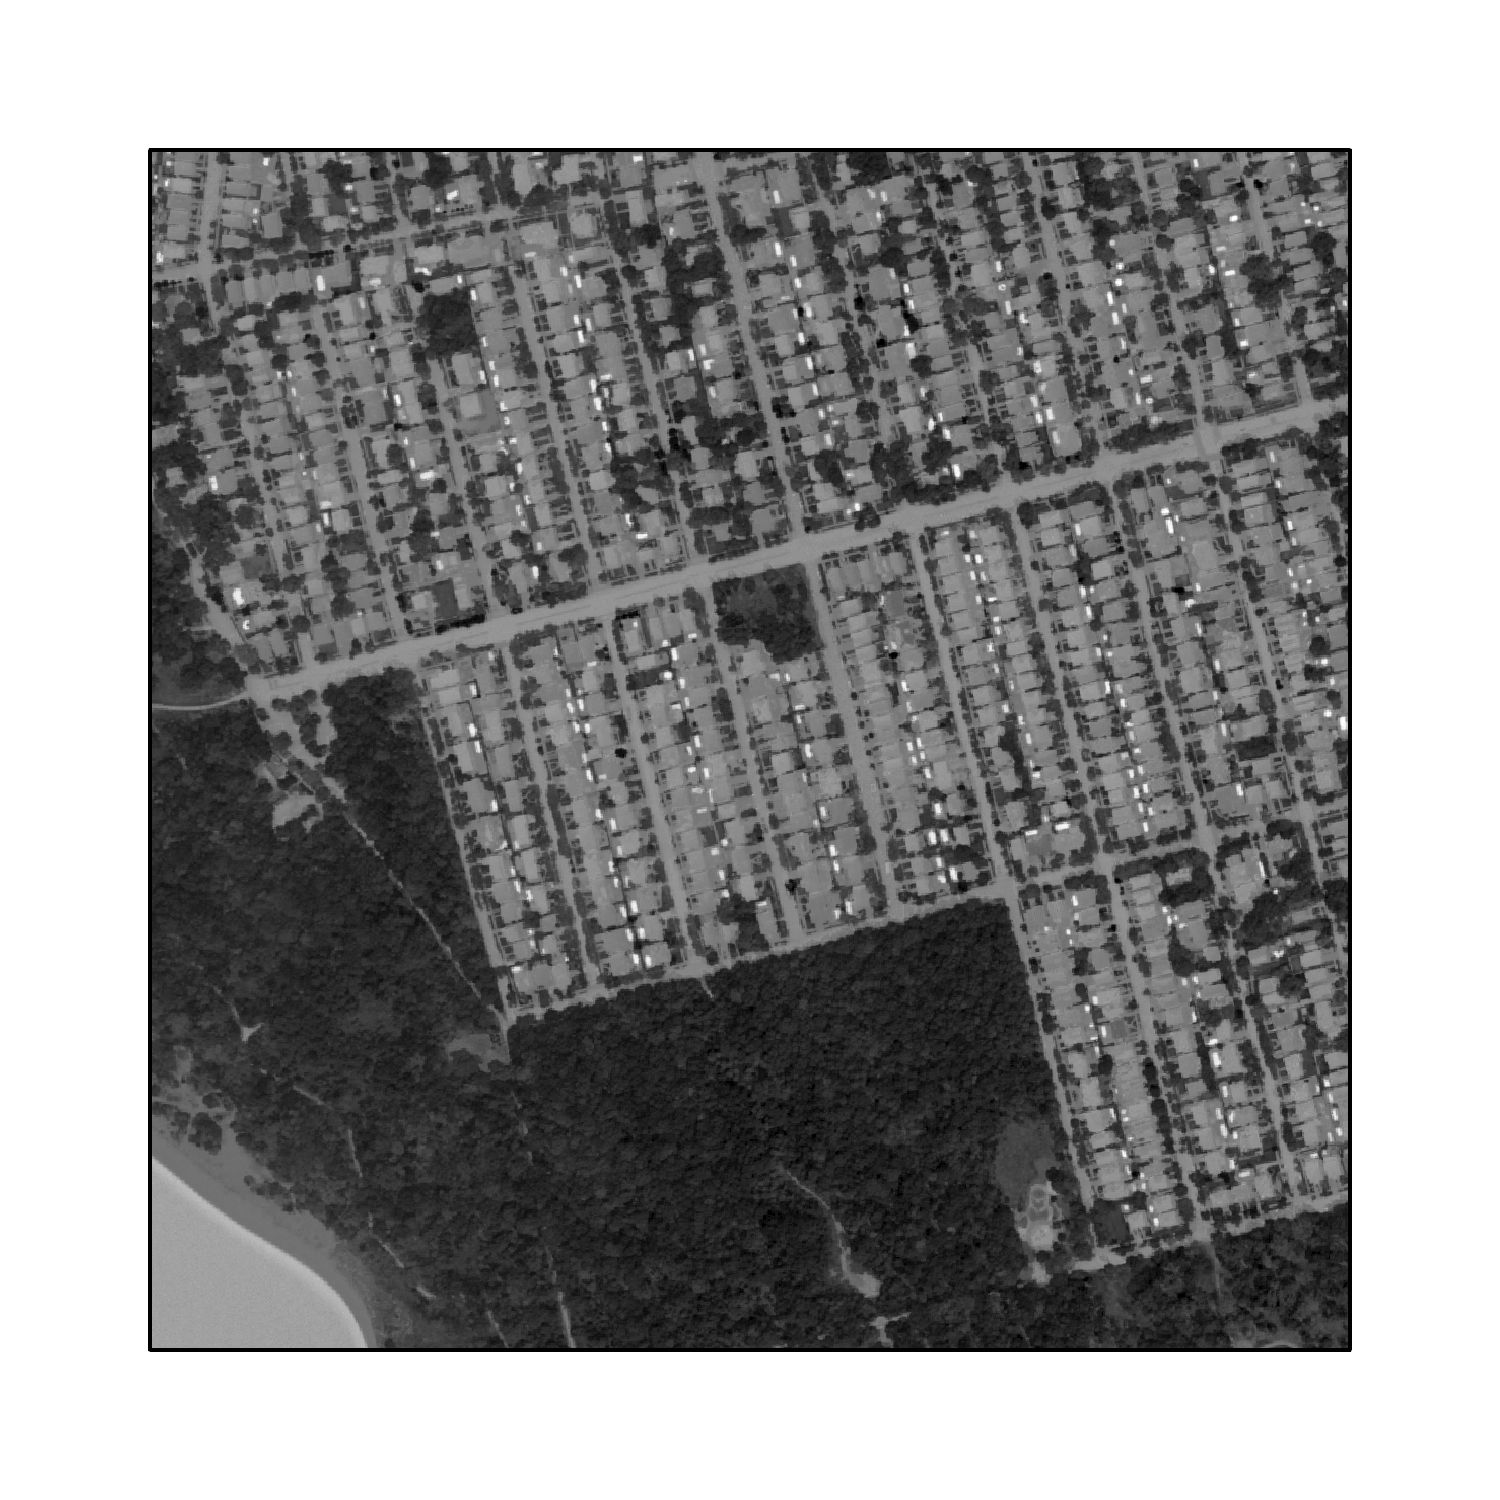

#### Canopy Height Model (CHM)

Canopy is it the differance between the ground and the top of object on the ground. This gives you the hieght of all of these object. In this case we are looking for the hieght of water to classify the differenct between in ground and above ground pools.This done by subnect DSM from DEM.  

##### Create DSM 

In [ ]:
The first step is to bring in the DSM which is the top of all object. Like the NAIP they need to be mearged into a Mosaic. 

In [ ]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True

#Output
output = (r'D:\SwimmingPoolProject\data\output112620')

#DSM
hh_NYC_001_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DSM\\hh_NYC_001.tif")
hh_NYC_002_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DSM\\hh_NYC_002.tif")
hh_NYC_004_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DSM\\hh_NYC_004.tif")
hh_NYC_005_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DSM\\hh_NYC_005.tif")
hh_NYC_006_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DSM\\hh_NYC_006.tif")
hh_NYC_012_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DSM\\hh_NYC_012.tif")
hh_NYC_013_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DSM\\hh_NYC_013.tif")

#Creat Mosaic
DSM = arcpy.management.MosaicToNewRaster(input_rasters=[hh_NYC_013_tif, hh_NYC_012_tif, hh_NYC_006_tif, hh_NYC_005_tif, hh_NYC_004_tif, hh_NYC_002_tif, hh_NYC_001_tif], output_location=output, raster_dataset_name_with_extension="DSM.tif", coordinate_system_for_the_raster="PROJCS['WGS_1984_Web_Mercator_Auxiliary_Sphere',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Mercator_Auxiliary_Sphere'],PARAMETER['False_Easting',0.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',0.0],PARAMETER['Standard_Parallel_1',0.0],PARAMETER['Auxiliary_Sphere_Type',0.0],UNIT['Meter',1.0]]", pixel_type="64_BIT", cellsize=None, number_of_bands=1, mosaic_method="LAST", mosaic_colormap_mode="FIRST")[0]


In [ ]:
##### DSM 

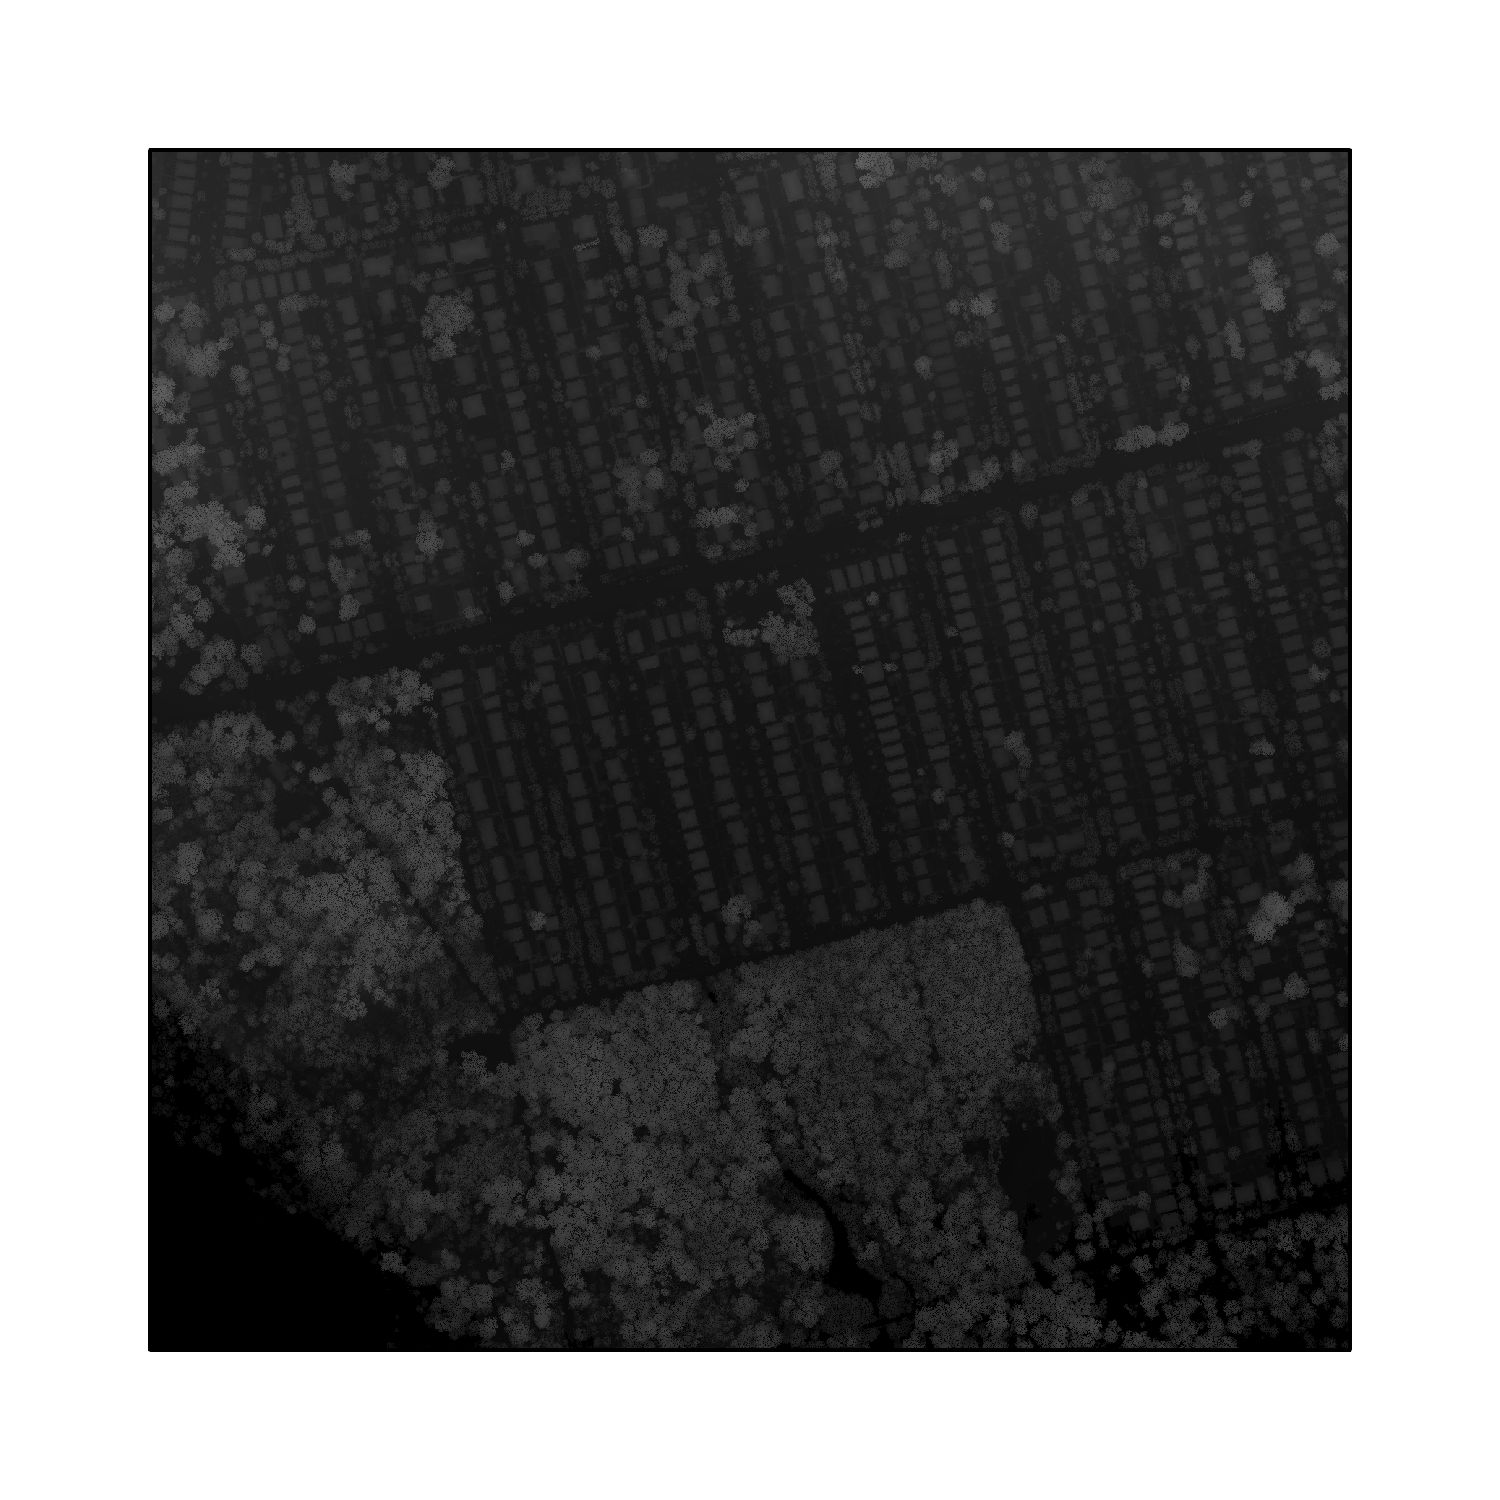

##### Create DEM 

In [ ]:
The same merge and mosiaic is done with The DEM. 

In [ ]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True

#Output
output = (r'D:\SwimmingPoolProject\data\output112620')

# DEM
be_NYC_001_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DEM\\be_NYC_001.tif")
be_NYC_002_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DEM\\be_NYC_002.tif")
be_NYC_004_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DEM\\be_NYC_004.tif")
be_NYC_005_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DEM\\be_NYC_005.tif")
be_NYC_006_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DEM\\be_NYC_006.tif")
be_NYC_012_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DEM\\be_NYC_012.tif")
be_NYC_013_tif = arcpy.Raster("D:\\SwimmingPoolProject\\data\\tiff\\DEM\\be_NYC_013.tif")

#Creat Mosaic
DEM = arcpy.management.MosaicToNewRaster(input_rasters=[be_NYC_013_tif, be_NYC_012_tif, be_NYC_006_tif, be_NYC_005_tif, be_NYC_004_tif, be_NYC_002_tif, be_NYC_001_tif], output_location=output, raster_dataset_name_with_extension="DEM.tif", coordinate_system_for_the_raster="PROJCS['WGS_1984_Web_Mercator_Auxiliary_Sphere',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Mercator_Auxiliary_Sphere'],PARAMETER['False_Easting',0.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',0.0],PARAMETER['Standard_Parallel_1',0.0],PARAMETER['Auxiliary_Sphere_Type',0.0],UNIT['Meter',1.0]]", pixel_type="64_BIT", cellsize=None, number_of_bands=1, mosaic_method="LAST", mosaic_colormap_mode="FIRST")[0]


In [ ]:
##### DEM 

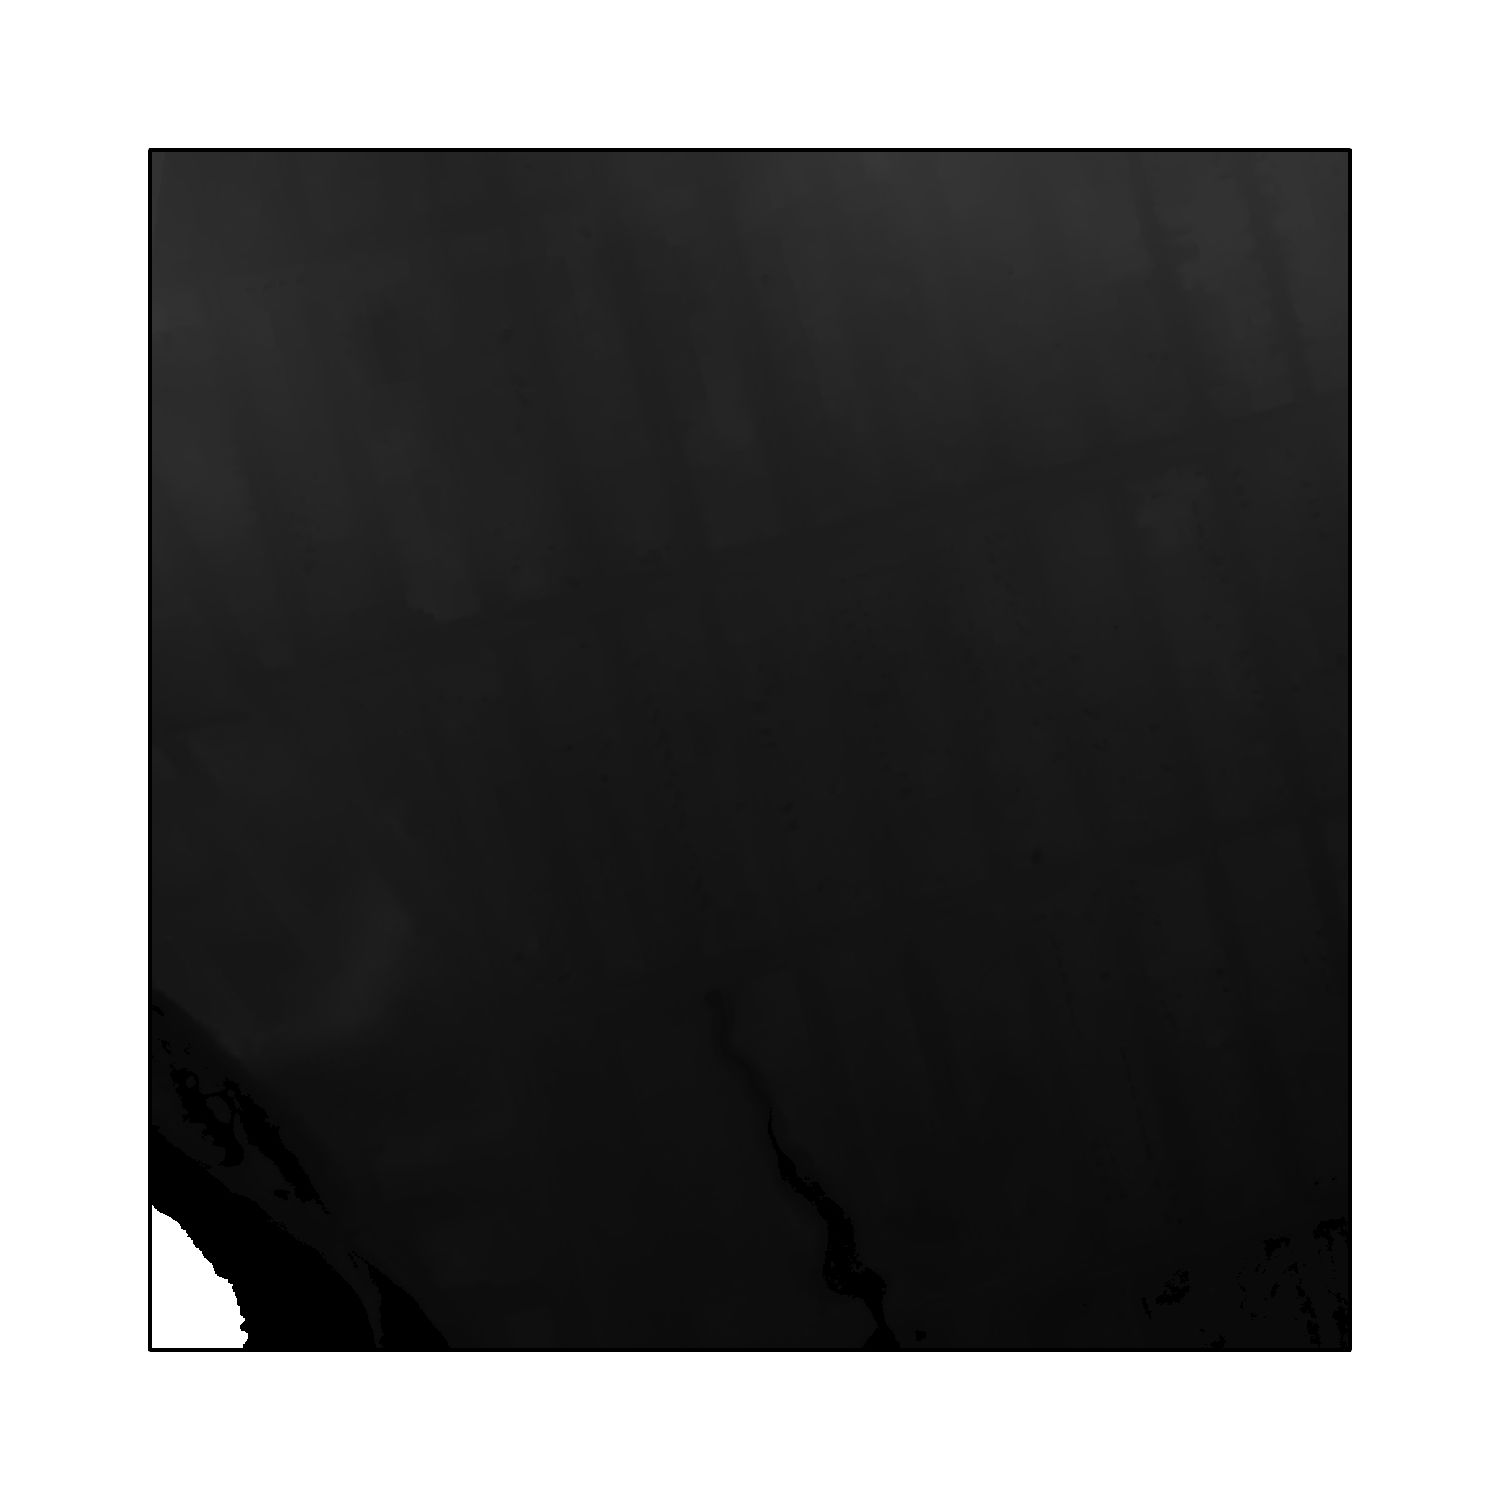

##### Create CHS 

The next step is to subtract the DSM from the DEM. this is done at the pixel level. In the end we are given a image of height of structures. 

In [ ]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy
from arcpy.sa import *

#Env control
arcpy.env.overwriteOutput = True

#Output
output = (r'D:\SwimmingPoolProject\data\output112620')

#Import
DSM = arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\DSM.tif')
DEM= arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\DEM.tif')

#Band Math 
CHS = Raster(DSM) - Raster(DEM)

#Export Raster 
arcpy.management.CopyRaster(in_raster=CHS, out_rasterdataset=(r'D:\SwimmingPoolProject\data\output112620\CHS.tif'), config_keyword="", background_value=None, nodata_value="256", onebit_to_eightbit="NONE", colormap_to_RGB="NONE", pixel_type="", scale_pixel_value="NONE", RGB_to_Colormap="NONE", format="TIFF", transform="NONE", process_as_multidimensional="CURRENT_SLICE", build_multidimensional_transpose="NO_TRANSPOSE")
print("DONE")

In [ ]:
##### CHS 

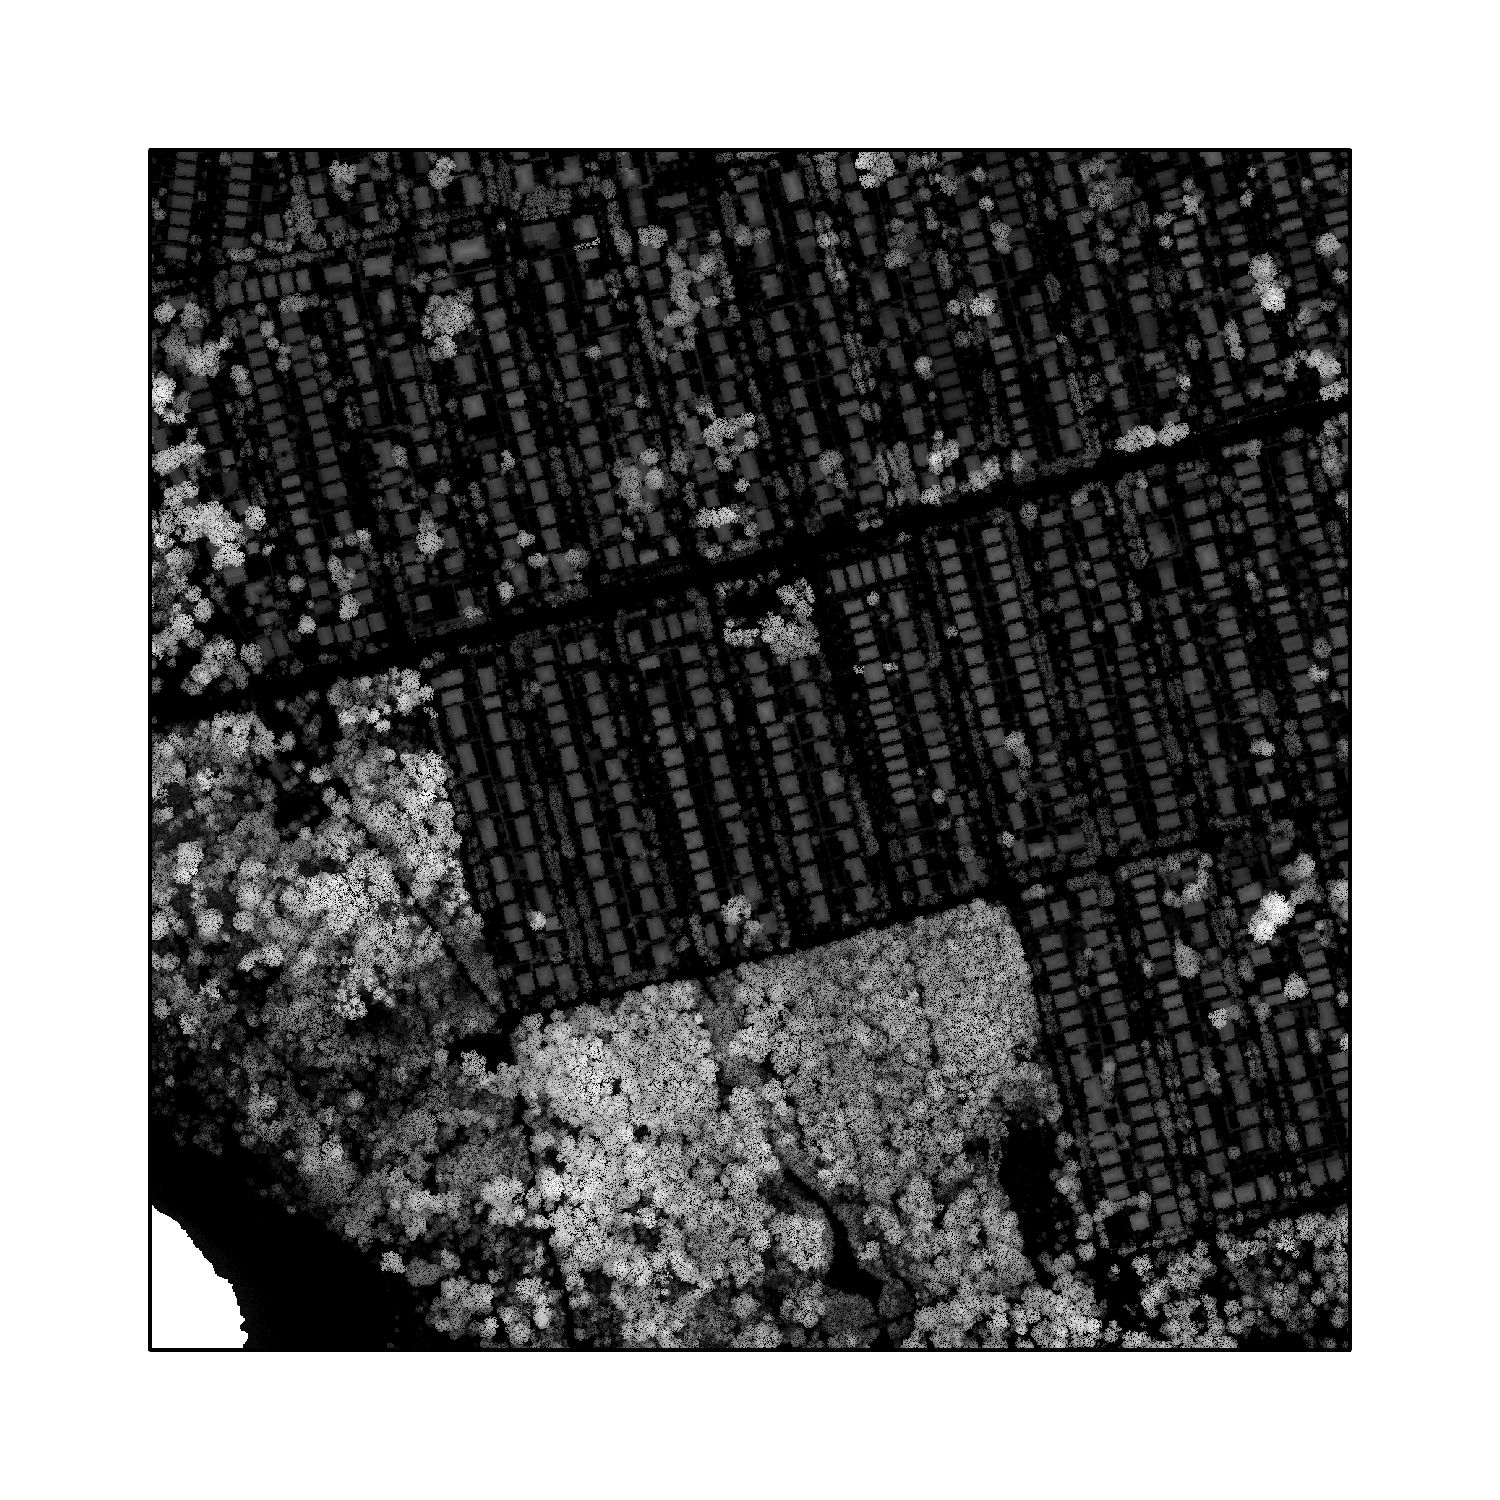

#### Decesion Tree

The next is to classify, inground pools, above ground pools, false positives and non pools. This is done by using a Dession tree to classify each group. This is done using a series of conditional statements. Starting with less than .2 we know that it is not a pool so it classified as one. The next is it the Height is above 5 feet week know that it not a pool so they can be filter out as false posivites. The next step is if the pool is greater than 0 it is above ground and if it is low than 0 it is inground. All of these level us is a tif with is one of the 4 values. 

In [18]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy
from arcpy.ia import *
from arcpy.sa import *

#Env control
arcpy.env.overwriteOutput = True

#Imports 
output = (r'D:\SwimmingPoolProject\data\output112620')
NDWI = arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\NDWI.tif')
CHS = arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\CHS.tif')

#Decision Tree Classifier
#OG
#Dtree = Con(NDWI< .20,1, Con(CHS>5,2, Con(CHS>0,3,4,)))
Dtree = Con(NDWI< .20,1, Con(CHS>5,2, Con(CHS>.5,3,4,)))

#Export as a new raster
arcpy.management.CopyRaster(in_raster=Dtree , out_rasterdataset=(r'D:\SwimmingPoolProject\data\output112620\Dtree.tif'), config_keyword="", background_value=None, nodata_value="256", onebit_to_eightbit="NONE", colormap_to_RGB="NONE", pixel_type="", scale_pixel_value="NONE", RGB_to_Colormap="NONE", format="TIFF", transform="NONE", process_as_multidimensional="CURRENT_SLICE", build_multidimensional_transpose="NO_TRANSPOSE")


<Result 'D:\\SwimmingPoolProject\\data\\output112620\\Dtree.tif'>

##### DTREE 

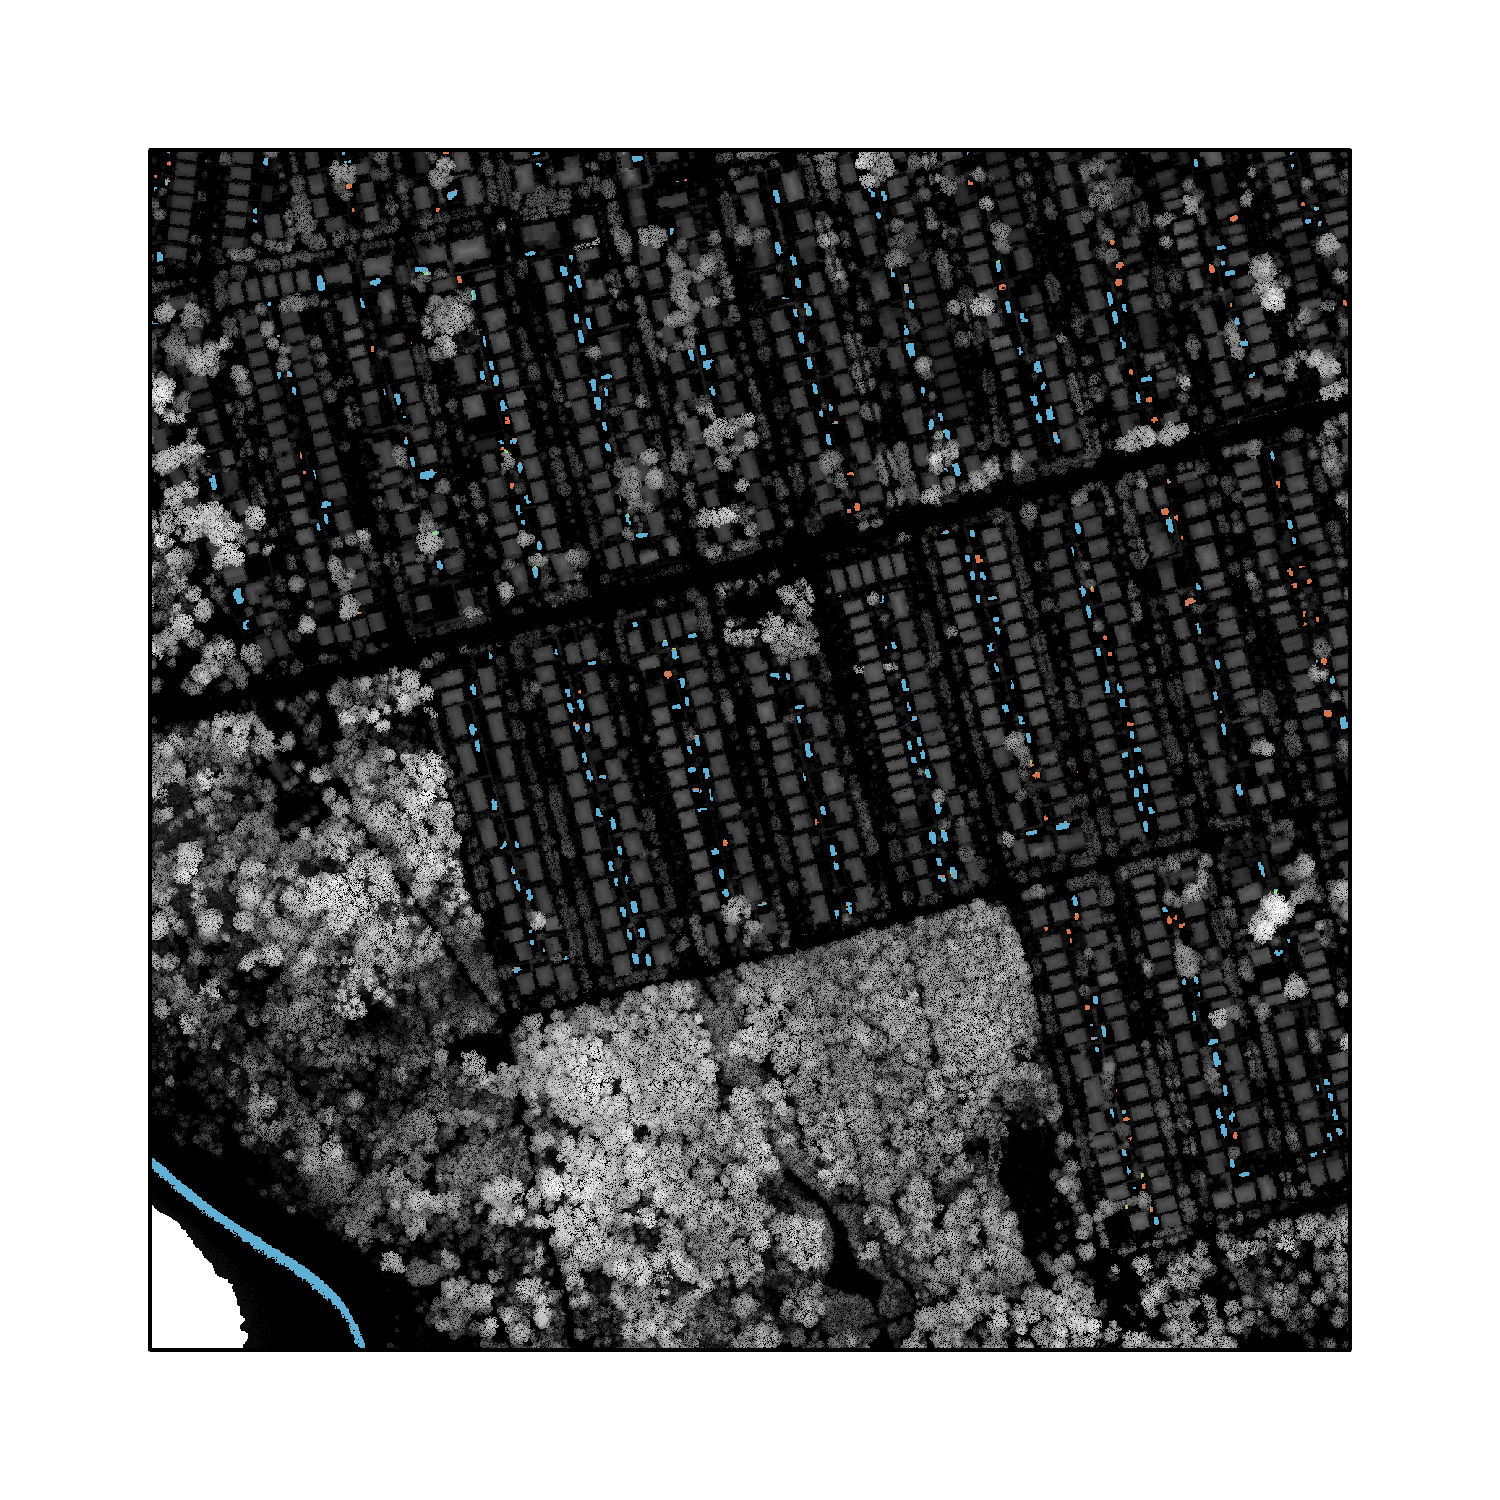

### Vector and Tableular data 

The next part is combine this rater data with the vector data. This is done by bringing in the cadstral data in the form of the digital tax map (DTM) and cound the number of pool pixles found with in them. This is done by using and arc pro feature call tabular count. 

#### Tabular count  

The tabular count by counting each pixel with in a polygon and putting them in a column. In this case the out put is a table that has number 1-4 by bbl. After that is created it is appened to the DTM. After that is done a new column called "pool" is created. To fill in this column it looks at columns 3 for inground pool and column 4 for above ground pools and if 3 is greater than 4 it is inground and it has more 4 than it is inground. In both are 0 then there is no pool. 

In [41]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True

#Outputs
output = (r'D:\SwimmingPoolProject\data\output112620')
DTM_Pools = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools.shp")
DTM_si = (r"D:\SwimmingPoolProject\data\shp\Digital_Tax_Map_20200403\DTM_si.shp")

#Imports 
Dtree = arcpy.Raster(r'D:\SwimmingPoolProject\data\output112620\Dtree.tif')
DTM = (r"D:\SwimmingPoolProject\data\shp\Digital_Tax_Map_20200403\DTM_Tax_Lot_Polygon.shp")


#Filter DTM for only Staten Island Lots 
arcpy.analysis.Select(in_features=DTM, out_feature_class=DTM_si, where_clause="BORO = '5'")

#Counts number of Pixels and type of Pixel per taxlot this output as a table 
Tabulat_DTM_SI2 = (r"D:\SwimmingPoolProject\data\shp\Tabulat_DTM_SI2.dbf")
arcpy.sa.TabulateArea(in_zone_data=DTM_si, zone_field="BBL", in_class_data=Dtree, class_field="VALUE",
                      out_table=Tabulat_DTM_SI2,
                      processing_cell_size="D:\\SwimmingPoolProject\\data\\output\\Dtree.tif",
                      classes_as_rows="CLASSES_AS_FIELDS")

# This append the pixel table to the DTM shapefile 
# Process: Add Join (Add Join) (management)
DTM_si_Layer1 = \
arcpy.management.AddJoin(in_layer_or_view=DTM_si, in_field="BBL", join_table=Tabulat_DTM_SI2, join_field="BBL",
                         join_type="KEEP_ALL")[0]

#This Add a New Field to that shapefile 
# Process: Add Field (Add Field) (management)
DTM_SI_3 = \
arcpy.management.AddField(in_table=DTM_si_Layer1, field_name="Pools", field_type="TEXT", field_precision=None,
                          field_scale=None, field_length=None, field_alias="", field_is_nullable="NULLABLE",
                          field_is_required="NON_REQUIRED", field_domain="")[0]

#The classify the type of pull by pixels in the tax lot 
DTM_Pools = DTM_SI_3

inFeatures = DTM_SI_3
fieldName = "Pools"
expression = "ifelse(!VALUE_3!,!VALUE_4!)"

code_block = ("""
def ifelse(VALUE_3, VALUE_4):
    if VALUE_3 > VALUE_4:
        return 'aboveground'
    elif VALUE_3 < VALUE_4:
        return 'inground'
    else:
        return 'nopool' """)
#This step runs it 
arcpy.CalculateField_management(inFeatures, fieldName, expression, "PYTHON3",
                                code_block)

#This step create the new shapefile 
arcpy.FeatureClassToFeatureClass_conversion(DTM_Pools,
                                            "D:\\SwimmingPoolProject\\data\\shp\\",
                                            "DTM_Pools_120220.shp")


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

<Result 'D:\\SwimmingPoolProject\\data\\shp\\DTM_Pools_120220.shp'>

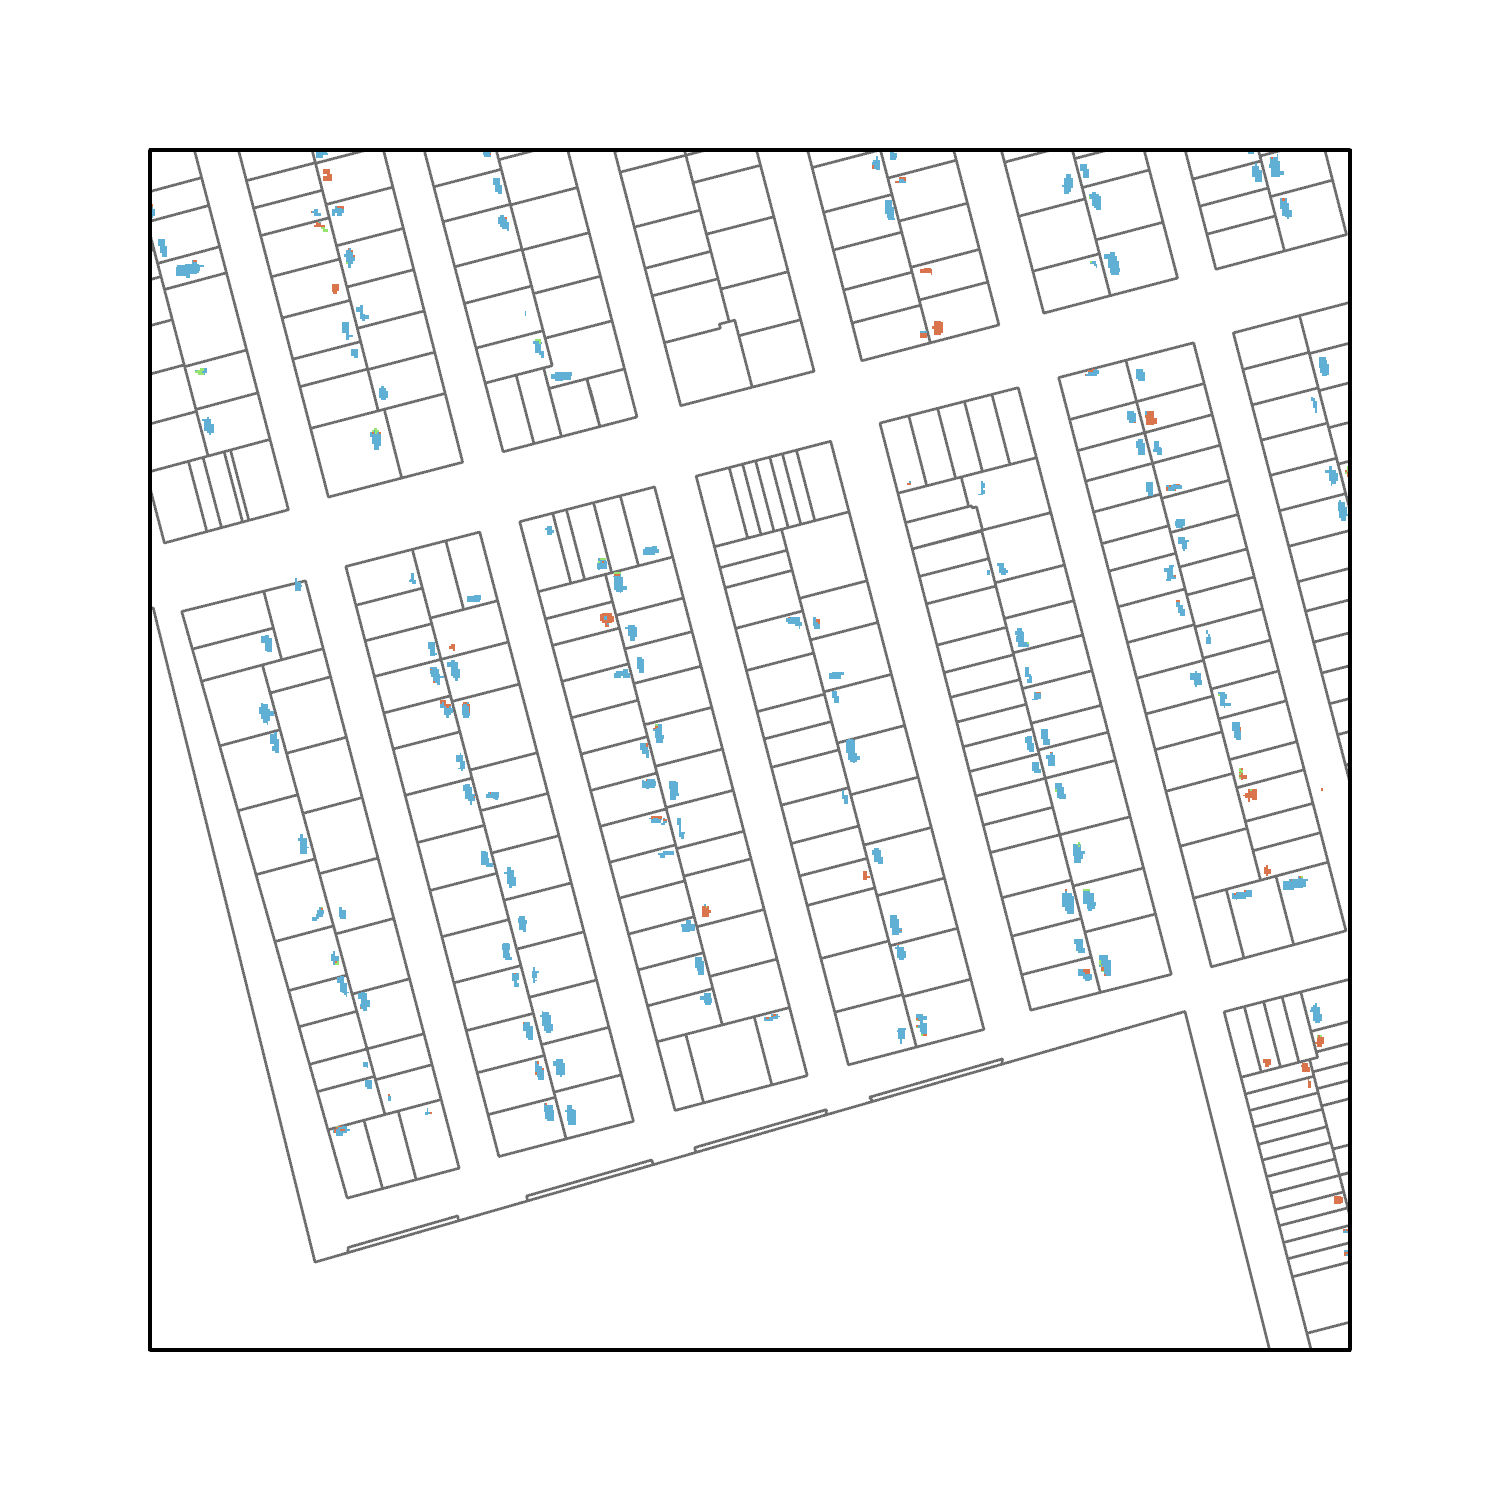

### Add the Sale info 

The next part of the project is to bring in the Sale and desciptive data from NYC Deparment of Finance and Descritive data from NYC Deparment of City Planning. The annualize sales data is from NYC OF and tract the exchange of properties over each year. Both Sales data from 15 and 16 are used to aid creating the model. 

##### Sale 15 

The Sale data come as a CSV. It is processed in pandas then it join in arcpy. 

In [19]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import pandas as pd
import arcpy

#Env control
arcpy.env.overwriteOutput = True

#Outputs
output = (r'D:\SwimmingPoolProject\data\output112620')
DTM_Pools = ('D:\\SwimmingPoolProject\\data\\shp\\DTM_Pools_120220.shp')
DTM_Pools_15 = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15.shp")
DTM_Pools_15_16 = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16.shp")
DTM_Pools_15_16_p = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16_p.shp")

#SI_15_Sales
SI_15_Sales=  pd.read_csv(r'D:\SwimmingPoolProject\data\csv\SI_15_Sales.csv')

#Filter for Fields 
SI_15_Sales.columns = ['BBL15', 'LANDSQFT15', 'GSFT15', 'YB15',
       'SPRICE15', 'SPSQFT15']
#Export import CSV in pandas 
SI_15_Sales.to_csv(r'D:\SwimmingPoolProject\data\csv\PLUTO_SI_Pools_15a.csv')
SI_15_Salesa =pd.read_csv(r'D:\SwimmingPoolProject\data\csv\PLUTO_SI_Pools_15a.csv')

#import CSV
SI_15_Sales = (r'D:\SwimmingPoolProject\data\csv\PLUTO_SI_Pools_15a.csv')


#Create shapefile 
arcpy.FeatureClassToFeatureClass_conversion(DTM_Pools_15a,
                                            "D:\\SwimmingPoolProject\\data\\shp\\",
                                            "DTM_Pools_15.shp")

<Result 'D:\\SwimmingPoolProject\\data\\shp\\DTM_Pools_15.shp'>

##### Sale 16

The same step are done again for the 2016 data. 

In [20]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import pandas as pd
import arcpy

#Env control
arcpy.env.overwriteOutput = True

#Outputs
output = (r'D:\SwimmingPoolProject\data\output112620')
DTM_Pools = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools.shp")
DTM_Pools_15 = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15.shp")
DTM_Pools_15_16 = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16.shp")
DTM_Pools_15_16_p = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16_p.shp")

#SI_16_Sales
SI_16_Sales =   pd.read_csv(r'D:\SwimmingPoolProject\data\csv\SI_16_Sales.csv')

#Filter for Fields
SI_16_Sales.columns = ['Unnamed: 0', 'LANDSQFT16', 'GSFT16', 'YB16',
       'SPRICE16', 'SPSQFT16', 'BBL16']

#Export import CSV in pandas
SI_16_Sales.to_csv(r'D:\SwimmingPoolProject\data\csv\SI_16_Salesa.csv')
SI_16_Sales =pd.read_csv(r'D:\SwimmingPoolProject\data\csv\SI_16_Salesa.csv')

#import CSV
SI_16_Sales = (r'D:\SwimmingPoolProject\data\csv\SI_16_Salesa.csv')

#Join in Arc Pro
DTM_Pools_15_16 = arcpy.management.JoinField(in_data=DTM_Pools_15, in_field="BBL", join_table=SI_16_Sales, join_field='BBL16', fields=[])[0]

#Create shapefile 
arcpy.FeatureClassToFeatureClass_conversion(DTM_Pools_15_16,
                                            "D:\\SwimmingPoolProject\\data\\shp\\",
                                            "DTM_Pools_15_16.shp")


<Result 'D:\\SwimmingPoolProject\\data\\shp\\DTM_Pools_15_16.shp'>

##### Sale Pluto

The last step is to bring in the the pluto data. In this can it joining two shapefiles. 

In [18]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True


#Import
DTM_Pools_15_16a = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16.shp")
MapPLUTO = (r"D:\SwimmingPoolProject\data\shp\MapPLUTO.shp")

#Join
DTM_Pools_15_16_p = arcpy.management.JoinField(in_data=DTM_Pools_15_16a, in_field="BBL", join_table=MapPLUTO, join_field="BBL", fields=[])[0]

#Create shapefile 
arcpy.FeatureClassToFeatureClass_conversion(DTM_Pools_15_16_p,
                                            "D:\\SwimmingPoolProject\\data\\shp\\",
                                            "DTM_Pools_15_16_pluto.shp")

<Result 'D:\\SwimmingPoolProject\\data\\shp\\DTM_Pools_15_16_pluto.shp'>

In [5]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True

#Import
DTM_Pools_15_16p = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16_pluto.shp")
NTA = (r"D:\SwimmingPoolProject\data\shp\NTA\geo_export_53f84381-2111-49b2-9bfa-a395404e23df.shp")
DTM_Pools_15_16nta = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16_nta.shp")


#Join

arcpy.SpatialJoin_analysis(DTM_Pools_15_16p, NTA, DTM_Pools_15_16nta)

#Create shapefile 
arcpy.FeatureClassToFeatureClass_conversion(DTM_Pools_15_16nta,
                                            "D:\\SwimmingPoolProject\\data\\shp\\",
                                            "DTM_Pools_15_16nta.shp")


<Result 'D:\\SwimmingPoolProject\\data\\shp\\DTM_Pools_15_16nta.shp'>

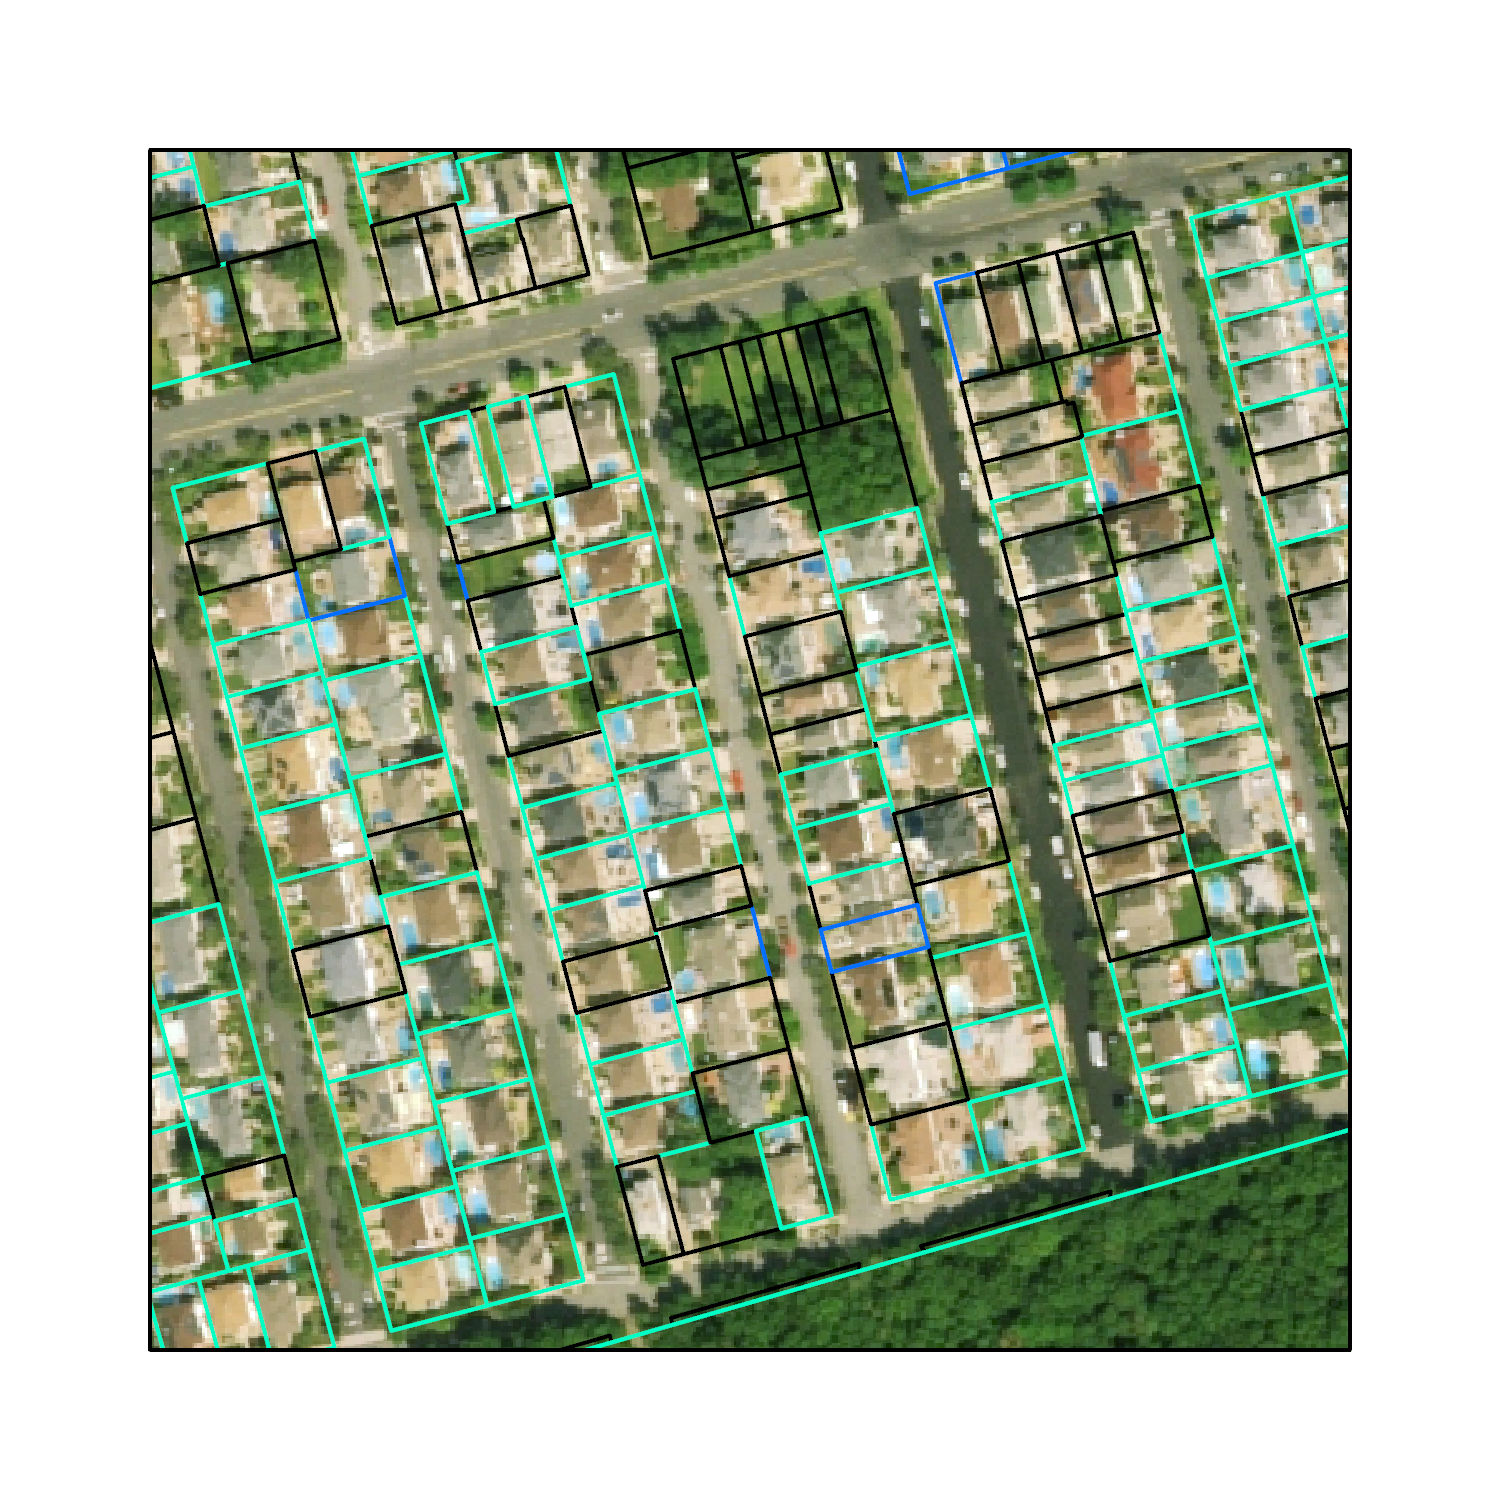

# Accuracy Assessment 

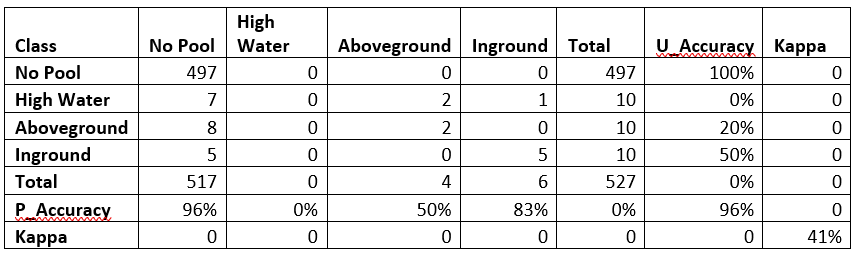


The find how accurate the model is we will be using accuracy assessment(Congalton and Green 2008). The is done by running use stratified random sample which will then produce a list of 527 points with the pixel value attributed to them. Then I will hide that value and go though the pixel can code them how I think they should be. The out is the table above of what the agreement is between the two tables. 
Due to the small sample of Aboveground and inground values this led to the errors. 



# Charts 


At this point we convert the shapefile with geographic data in to and CSV to create charts 

#Libs
from arcgis.gis import GIS
my_gis = GIS("https://www.arcgis.com/", "rabugel_HC", "Fighton20151!")
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True


#Import
DTM_Pools_15_16nta = (r"D:\SwimmingPoolProject\data\shp\DTM_Pools_15_16nta.shp")

csv = (r"D:\\SwimmingPoolProject\\data\\csv\\")

Pools_020321_csv = arcpy.TableToTable_conversion (DTM_Pools_15_16nta , csv, 'Pools_020321nta.csv')

## Count of Pools 

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.gcf()

# Change seaborn plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})


Pools =pd.read_csv(r"D:\SwimmingPoolProject\data\csv\Pools_020321nta.csv")

C:\Users\17183\anaconda3\envs\Deeplearning_2\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,220) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<Figure size 842.4x595.44 with 0 Axes>

In [187]:
Pools.columns

Index(['OID_', 'Join_Count', 'TARGET_FID', 'OBJECTID', 'BORO', 'BLOCK', 'LOT',
       'BBL', 'GLOBALID', 'SHAPE_AREA',
       ...
       'Notes_1', 'Shape_Le_1', 'Shape_Ar_2', 'boro_code', 'boro_name',
       'county_fip', 'ntacode', 'ntaname', 'shape_ar_3', 'shape_le_2'],
      dtype='object', length=225)

In [188]:
foo = ['BBL', 'Pools', 'SPRICE15','YearBuil_1','BldgArea_1','LotArea_1','Tract201_1','Latitude_1', 'Longitud_1',
      'ntacode', 'ntaname']

In [189]:
Pools = Pools[foo]

In [190]:
Pools

BBL     Pools  SPRICE15  YearBuil_1  BldgArea_1  LotArea_1  \
0       5057410049    nopool       0.0        1996         929        353   
1       5069670027    nopool       0.0        1987        1440       2500   
2       5012320007    nopool       0.0        1925        1728       3340   
3       5023970047    nopool       0.0        1987        1804       1800   
4       5052680217  inground       0.0        1980        3088      13500   
...            ...       ...       ...         ...         ...        ...   
124847  5004840031    nopool       0.0        2020        3939       4000   
124848  5054410076    nopool       0.0        1920        2410       6345   
124849  5004840053    nopool       0.0        1955        1773       5000   
124850  5054410074    nopool       0.0           0           0       4842   
124851  5004840032    nopool       0.0        2020        3939       4000   

       Tract201_1  Latitude_1  Longitud_1 ntacode  \
0          017007   40.560121  -74.183098    SI48   
1          020803   40.536332  -74.210238    SI32   
2            0231   40.628929  -74.158555    SI12   
3          027705   40.585776  -74.158294    SI24   
4          015601   40.540169  -74.159506    SI54   
...           ...         ...         ...     ...   
124847     018901   40.613690  -74.146208    SI07   
124848     014604   40.554248  -74.154732    SI54   
124849     018901   40.613561  -74.145858    SI07   
124850     014604   40.554229  -74.154811    SI54   
124851     018901   40.613632  -74.146215    SI07   

                                                  ntaname  
0                                           Arden Heights  
1                                       Rossville-Woodrow  
2       Mariner's Harbor-Arlington-Port Ivory-Granitev...  
3       Todt Hill-Emerson Hill-Heartland Village-Light...  
4                                             Great Kills  
...                                                   ...  
124847                                        Westerleigh  
124848                                        Great Kills  
124849                                        Westerleigh  
124850                                        Great Kills  
124851                                        Westerleigh  

[124852 rows x 11 columns]

In [191]:
N1, N2, N3 = len(Pools[Pools['Pools'] == 'nopool']), len(Pools[Pools['Pools'] == 'inground']),len(Pools[Pools['Pools'] == 'aboveground'])

In [192]:
width = 0.125

Text(0.5, 0.98, ' Count of Pools in SI,NY 2015 ')

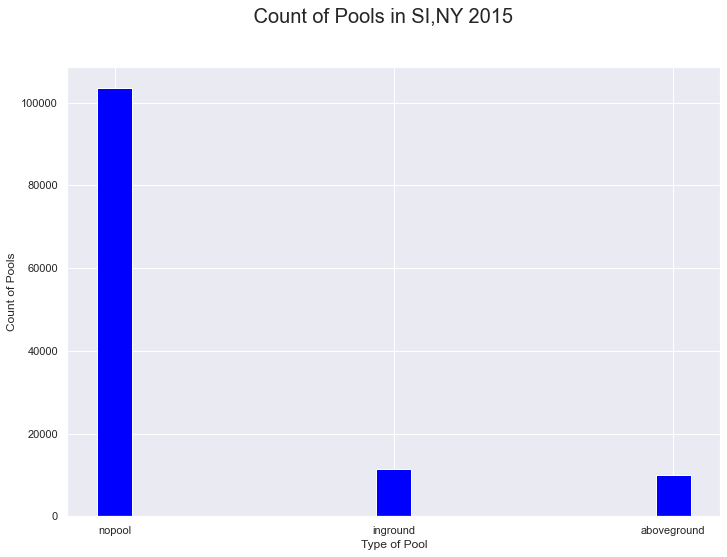

In [193]:
plt.bar(['nopool','inground','aboveground'], [N1, N2, N3], width, color="blue")
plt.ylabel('Count of Pools')
plt.xlabel('Type of Pool')
plt.suptitle(' Count of Pools in SI,NY 2015 ', fontsize=20) 

Of the 63,093 single family home in Staten Island in 2015, 6,932 had aboveground swimming pool, and 6,915 hand inground swimming pool.

## Count of Pools that sold 

In [194]:
Pools = Pools[(Pools.SPRICE15 > 0)]

In [195]:
Pools

BBL        Pools  SPRICE15  YearBuil_1  BldgArea_1  LotArea_1  \
20      5002610015       nopool  550000.0        1957        1810       6650   
188     5057430247       nopool  252000.0        2002        1354        500   
202     5029250199       nopool  233220.0        1992        1407        585   
227     5055070148  aboveground  441000.0        1980        1232       2185   
241     5003990009       nopool  300000.0        1930        1332       3000   
...            ...          ...       ...         ...         ...        ...   
124323  5038820014       nopool  420000.0           0        1196       2000   
124384  5040530051       nopool  335000.0        2017        1992       2425   
124421  5080080045       nopool  330000.0        1899        1668       6880   
124765  5067510260       nopool  750000.0        2020        4304      17019   
124769  5067510321       nopool  555000.0        1965        1112      10800   

       Tract201_1  Latitude_1  Longitud_1 ntacode  \
20           0067   40.629226  -74.105254    SI35   
188        017007   40.563907  -74.184818    SI48   
202          0040   40.614996  -74.079133    SI08   
227        014604   40.548474  -74.163916    SI54   
241          0201   40.620858  -74.133511    SI07   
...           ...         ...         ...     ...   
124323     011202   40.571676  -74.096003    SI45   
124384     012806   40.562664  -74.108597    SI25   
124421       0248   40.516803  -74.232799    SI11   
124765       0198   40.522531  -74.206130    SI01   
124769       0198   40.522584  -74.205458    SI01   

                                           ntaname  
20                        New Brighton-Silver Lake  
188                                  Arden Heights  
202                  Grymes Hill-Clifton-Fox Hills  
227                                    Great Kills  
241                                    Westerleigh  
...                                            ...  
124323                      New Dorp-Midland Beach  
124384                       Oakwood-Oakwood Beach  
124421      Charleston-Richmond Valley-Tottenville  
124765  Annadale-Huguenot-Prince's Bay-Eltingville  
124769  Annadale-Huguenot-Prince's Bay-Eltingville  

[3125 rows x 11 columns]

In [196]:
Pools ['SP_per_SQFT'] = Pools ['SPRICE15'] / Pools ['BldgArea_1']


C:\Users\17183\anaconda3\envs\Deeplearning_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
Pools.to_csv(r"D:\SwimmingPoolProject\data\csv\Pools_020321b.csv")
Pools =pd.read_csv(r"D:\SwimmingPoolProject\data\csv\Pools_020321b.csv")


In [198]:
Pools['SP_per_SQFT'] = Pools['SP_per_SQFT'].astype(float)

In [199]:
Pools.dtypes

Unnamed: 0       int64
BBL              int64
Pools           object
SPRICE15       float64
YearBuil_1       int64
BldgArea_1       int64
LotArea_1        int64
Tract201_1       int64
Latitude_1     float64
Longitud_1     float64
ntacode         object
ntaname         object
SP_per_SQFT    float64
dtype: object

In [200]:
Pools = Pools[(Pools.BldgArea_1 > 0)]
Pools = Pools[(Pools.YearBuil_1> 0)]

In [201]:
Pools

Unnamed: 0         BBL        Pools  SPRICE15  YearBuil_1  BldgArea_1  \
0             20  5002610015       nopool  550000.0        1957        1810   
1            188  5057430247       nopool  252000.0        2002        1354   
2            202  5029250199       nopool  233220.0        1992        1407   
3            227  5055070148  aboveground  441000.0        1980        1232   
4            241  5003990009       nopool  300000.0        1930        1332   
...          ...         ...          ...       ...         ...         ...   
3118      124130  5036350077     inground  606670.0        1920        1632   
3121      124384  5040530051       nopool  335000.0        2017        1992   
3122      124421  5080080045       nopool  330000.0        1899        1668   
3123      124765  5067510260       nopool  750000.0        2020        4304   
3124      124769  5067510321       nopool  555000.0        1965        1112   

      LotArea_1  Tract201_1  Latitude_1  Longitud_1 ntacode  \
0          6650          67   40.629226  -74.105254    SI35   
1           500       17007   40.563907  -74.184818    SI48   
2           585          40   40.614996  -74.079133    SI08   
3          2185       14604   40.548474  -74.163916    SI54   
4          3000         201   40.620858  -74.133511    SI07   
...         ...         ...         ...         ...     ...   
3118       4000         122   40.574334  -74.112706    SI45   
3121       2425       12806   40.562664  -74.108597    SI25   
3122       6880         248   40.516803  -74.232799    SI11   
3123      17019         198   40.522531  -74.206130    SI01   
3124      10800         198   40.522584  -74.205458    SI01   

                                         ntaname  SP_per_SQFT  
0                       New Brighton-Silver Lake   303.867403  
1                                  Arden Heights   186.115214  
2                  Grymes Hill-Clifton-Fox Hills   165.756930  
3                                    Great Kills   357.954545  
4                                    Westerleigh   225.225225  
...                                          ...          ...  
3118                      New Dorp-Midland Beach   371.734069  
3121                       Oakwood-Oakwood Beach   168.172691  
3122      Charleston-Richmond Valley-Tottenville   197.841727  
3123  Annadale-Huguenot-Prince's Bay-Eltingville   174.256506  
3124  Annadale-Huguenot-Prince's Bay-Eltingville   499.100719  

[3041 rows x 13 columns]

In [202]:
N1, N2, N3 = len(Pools[Pools['Pools'] == 'nopool']), len(Pools[Pools['Pools'] == 'inground']),len(Pools[Pools['Pools'] == 'aboveground'])

In [203]:
colors = {'inground':'green', 'aboveground':'blue','nopool':'yellow' }

Text(0.5, 0.98, ' Count of properties with pools sold in SI,NY 2015 ')

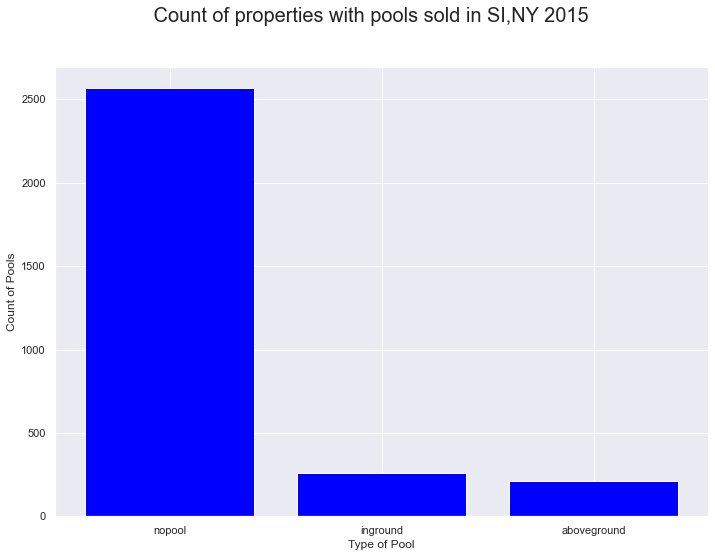

In [204]:
plt.bar(['nopool','inground','aboveground'], [N1, N2, N3], color="blue")
plt.ylabel('Count of Pools')
plt.xlabel('Type of Pool')
plt.suptitle(' Count of properties with pools sold in SI,NY 2015 ', fontsize=20) 

In [205]:
Pools.head()

Unnamed: 0         BBL        Pools  SPRICE15  YearBuil_1  BldgArea_1  \
0          20  5002610015       nopool  550000.0        1957        1810   
1         188  5057430247       nopool  252000.0        2002        1354   
2         202  5029250199       nopool  233220.0        1992        1407   
3         227  5055070148  aboveground  441000.0        1980        1232   
4         241  5003990009       nopool  300000.0        1930        1332   

   LotArea_1  Tract201_1  Latitude_1  Longitud_1 ntacode  \
0       6650          67   40.629226  -74.105254    SI35   
1        500       17007   40.563907  -74.184818    SI48   
2        585          40   40.614996  -74.079133    SI08   
3       2185       14604   40.548474  -74.163916    SI54   
4       3000         201   40.620858  -74.133511    SI07   

                         ntaname  SP_per_SQFT  
0       New Brighton-Silver Lake   303.867403  
1                  Arden Heights   186.115214  
2  Grymes Hill-Clifton-Fox Hills   165.756930  
3                    Great Kills   357.954545  
4                    Westerleigh   225.225225

Of those that sold 2,486 had 202 had aboveground swimming pool and 254 had inground swimming pools. 

## Box plot 

## Only Run in Deeplearning 2 

In [206]:
#https://www.youtube.com/watch?v=vvy_YRiEvpA

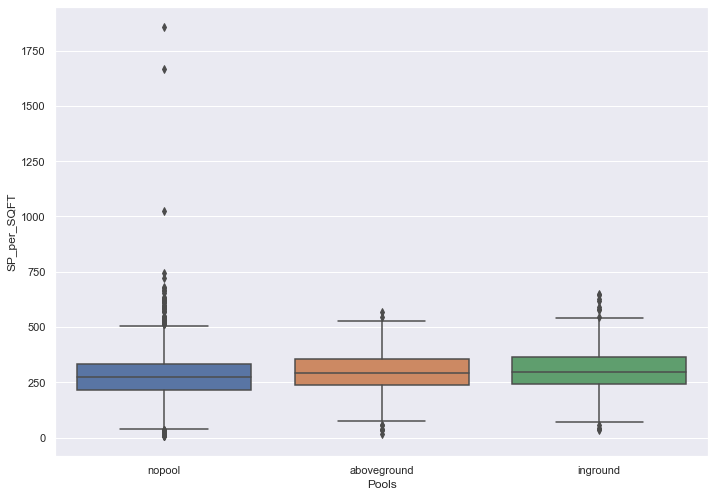

In [207]:
sns.boxplot(x='Pools',y='SP_per_SQFT',data=Pools)

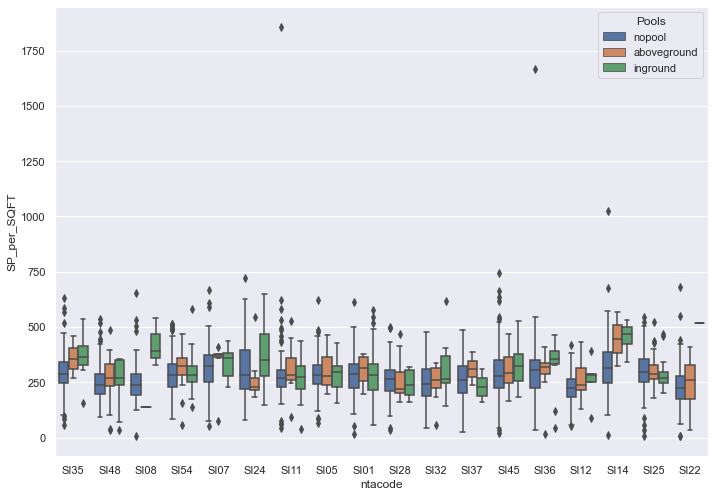

In [208]:
sns.boxplot(x='ntacode',y='SP_per_SQFT',data=Pools,hue='Pools')

sns.boxplot(x='ntacode',y='SPRICE15',data=Pools,hue='Pools')

# Finding Mean of NTA in ARC PRO 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





Pools =pd.read_csv(r"D:\SwimmingPoolProject\data\csv\Pools_020321b.csv")

#Filter for pools 
noPools =Pools[(Pools['Pools'] == 'nopool')]
aboveground =Pools[(Pools['Pools'] == 'aboveground')]
inground =Pools[(Pools['Pools'] == 'inground')]

#Filtering the table
subset = ['ntaname','ntacode', 'SPRICE15','SP_per_SQFT']
subset1= ['ntaname','ntacode']

name= Pools[subset1]
noPools_subset = noPools[subset]
aboveground_subset = aboveground[subset]
inground_subset = inground[subset]

#Finding the Median
name= name.drop_duplicates()
inground_median= inground_subset.groupby(by='ntacode').median()
aboveground_median= aboveground_subset.groupby(by='ntacode').median()
noPools_median= noPools_subset.groupby(by='ntacode').median()


#Rename in columns 
inground_median.to_csv(r"D:\SwimmingPoolProject\data\csv\inground_median.csv")
inground_median=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\inground_median.csv")
inground_median= inground_median.rename(columns={'SPRICE15':'SP_Med_IG','SP_per_SQFT':'SPsqft_IG'})

aboveground_median.to_csv(r"D:\SwimmingPoolProject\data\csv\aboveground_median.csv")
aboveground_median=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\aboveground_median.csv")
aboveground_median= aboveground_median.rename(columns={'SPRICE15':'SP_Med_AP','SP_per_SQFT':'SPsqft_AP'})

noPools_median.to_csv(r"D:\SwimmingPoolProject\data\csv\noPools_median.csv")
noPools_median=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\noPools_median.csv")
noPools_median= noPools_median.rename(columns={'SPRICE15':'SP_Med_NP','SP_per_SQFT':'SPsqft_NP'})


join1 =  inground_median.set_index('ntacode').join(aboveground_median.set_index('ntacode'))
join1.to_csv(r"D:\SwimmingPoolProject\data\csv\join1.csv")
join1=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\join1.csv")

join2 =  join1.set_index('ntacode').join(noPools_median.set_index('ntacode'))
join2.to_csv(r"D:\SwimmingPoolProject\data\csv\join2.csv")
join2=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\join2.csv")

join3 =  join2.set_index('ntacode').join(name.set_index('ntacode'))

In [13]:
join3

SP_Med_IG   SPsqft_IG  SP_Med_AP   SPsqft_AP  SP_Med_NP   SPsqft_NP  \
ntacode                                                                        
SI01      600000.0  282.511865   570000.0  316.666667   440000.0  289.819169   
SI05      500000.0  297.783934   440000.0  280.468085   430950.0  281.470383   
SI07      485000.0  360.435876   391750.0  375.318985   420395.0  324.786325   
SI08     2000000.0  391.666667   140000.0  136.452242   360000.0  236.280488   
SI11      489000.0  274.074074   493500.0  282.125545   469750.0  268.582051   
SI12      265000.0  281.565934   331000.0  235.746838   281500.0  222.297955   
SI14      687500.0  468.844697   451000.0  446.095133   426444.0  313.802649   
SI22      560000.0  520.446097   260000.0  262.296026   330000.0  227.218200   
SI24      832500.0  352.806728   468000.0  228.404100   537500.0  286.483740   
SI25      529900.0  268.049382   397500.0  288.415248   408516.5  313.673333   
SI28      367500.0  238.095238   335875.0  219.004725   349500.0  262.936093   
SI32      516000.0  265.956915   485000.0  261.562211   385000.0  244.094488   
SI35      675000.0  366.379310   499000.0  353.399433   445000.0  289.276808   
SI36      458000.0  356.617647   396500.0  320.795645   404499.5  343.566709   
SI37      345000.0  227.786797   375000.0  312.055067   345000.0  267.695100   
SI45      455000.0  325.000000   427500.0  292.120156   382500.0  277.928019   
SI48      527217.5  267.707317   423500.0  268.940357   335000.0  238.095238   
SI54      451000.0  285.087719   440000.0  323.663504   400000.0  283.097329   

                                                   ntaname  
ntacode                                                     
SI01            Annadale-Huguenot-Prince's Bay-Eltingville  
SI05                     New Springville-Bloomfield-Travis  
SI07                                           Westerleigh  
SI08                         Grymes Hill-Clifton-Fox Hills  
SI11                Charleston-Richmond Valley-Tottenville  
SI12     Mariner's Harbor-Arlington-Port Ivory-Granitev...  
SI14                       Grasmere-Arrochar-Ft. Wadsworth  
SI22             West New Brighton-New Brighton-St. George  
SI24     Todt Hill-Emerson Hill-Heartland Village-Light...  
SI25                                 Oakwood-Oakwood Beach  
SI28                                         Port Richmond  
SI32                                     Rossville-Woodrow  
SI35                              New Brighton-Silver Lake  
SI36                     Old Town-Dongan Hills-South Beach  
SI37                                    Stapleton-Rosebank  
SI45                                New Dorp-Midland Beach  
SI48                                         Arden Heights  
SI54                                           Great Kills

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





Pools =pd.read_csv(r"D:\SwimmingPoolProject\data\csv\Pools_020321b.csv")

#Filter for pools 
noPools =Pools[(Pools['Pools'] == 'nopool')]
aboveground =Pools[(Pools['Pools'] == 'aboveground')]
inground =Pools[(Pools['Pools'] == 'inground')]

#Filtering the table
subset = ['ntacode', 'SPRICE15','SP_per_SQFT']


noPools_subset = noPools[subset]
aboveground_subset = aboveground[subset]
inground_subset = inground[subset]

#Finding the Median
inground_median= inground_subset.groupby(by='ntacode').median()
aboveground_median= aboveground_subset.groupby(by='ntacode').median()
noPools_median= noPools_subset.groupby(by='ntacode').median()


#Rename in columns 
inground_median.to_csv(r"D:\SwimmingPoolProject\data\csv\inground_median.csv")
inground_median=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\inground_median.csv")
inground_median= inground_median.rename(columns={'SPRICE15':'SP_Med_IG','SP_per_SQFT':'SPsqft_IG'})

aboveground_median.to_csv(r"D:\SwimmingPoolProject\data\csv\aboveground_median.csv")
aboveground_median=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\aboveground_median.csv")
aboveground_median= aboveground_median.rename(columns={'SPRICE15':'SP_Med_AP','SP_per_SQFT':'SPsqft_AP'})

noPools_median.to_csv(r"D:\SwimmingPoolProject\data\csv\noPools_median.csv")
noPools_median=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\noPools_median.csv")
noPools_median= noPools_median.rename(columns={'SPRICE15':'SP_Med_NP','SP_per_SQFT':'SPsqft_NP'})


join1 =  inground_median.set_index('ntacode').join(aboveground_median.set_index('ntacode'))
join1.to_csv(r"D:\SwimmingPoolProject\data\csv\join1.csv")
join1=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\join1.csv")

join2 =  join1.set_index('ntacode').join(noPools_median.set_index('ntacode'))
join2.to_csv(r"D:\SwimmingPoolProject\data\csv\join2.csv")
join2=  pd.read_csv(r"D:\SwimmingPoolProject\data\csv\join2.csv")

This exports this field into a shapefile

In [50]:
#Libs
from arcgis.gis import GIS
my_gis = GIS()
my_gis.map()
import arcpy

#Env control
arcpy.env.overwriteOutput = True

#Import
NTA = (r"D:\SwimmingPoolProject\data\shp\NTA\geo_export_53f84381-2111-49b2-9bfa-a395404e23df.shp")
Join2 = (r"D:\SwimmingPoolProject\data\csv\join2.csv")

#Output
NTA_MED = (r"D:\SwimmingPoolProject\data\shp\NTA_MED_A.shp")

NTA_MED = arcpy.management.JoinField(in_data=NTA, in_field="ntacode", join_table=Join2, join_field="ntacode", fields=[])[0]

#Create shapefile 
arcpy.FeatureClassToFeatureClass_conversion(NTA_MED,
                                            "D:\\SwimmingPoolProject\\data\\shp\\",
                                            "NTA_MED_A.shp")

<Result 'D:\\SwimmingPoolProject\\data\\shp\\NTA_MED_A.shp'>

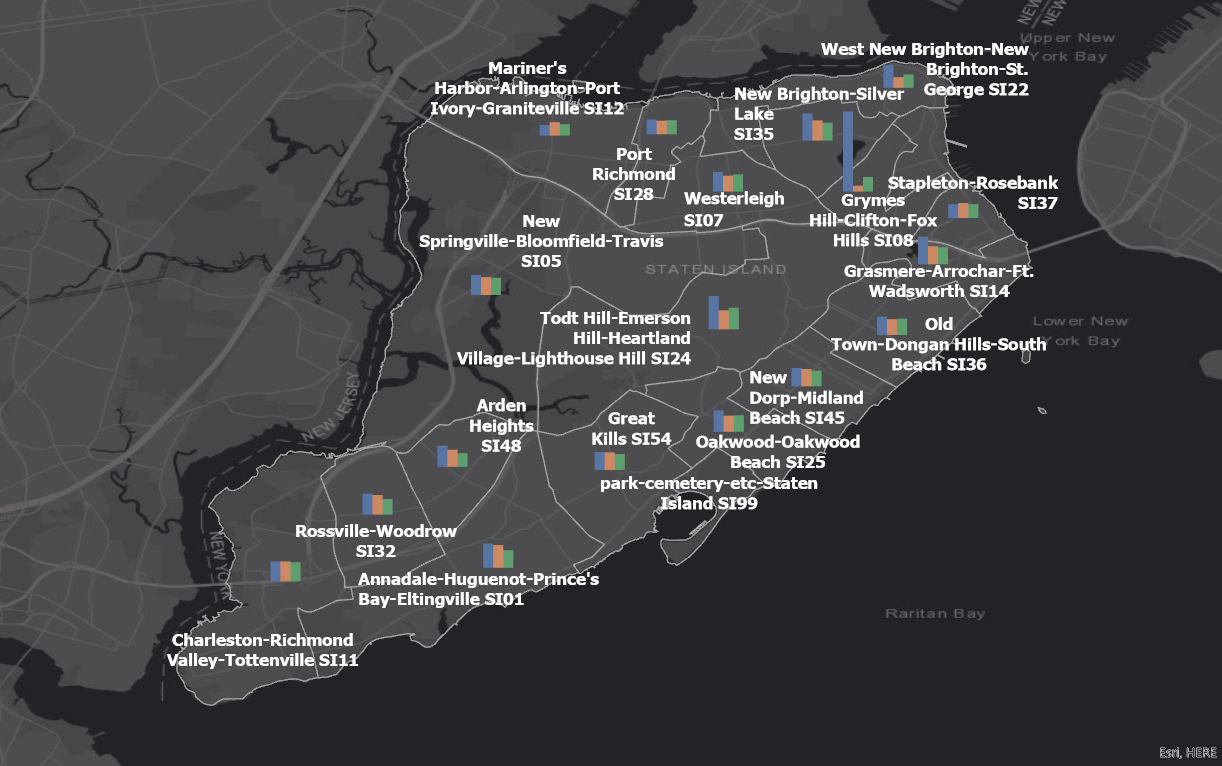

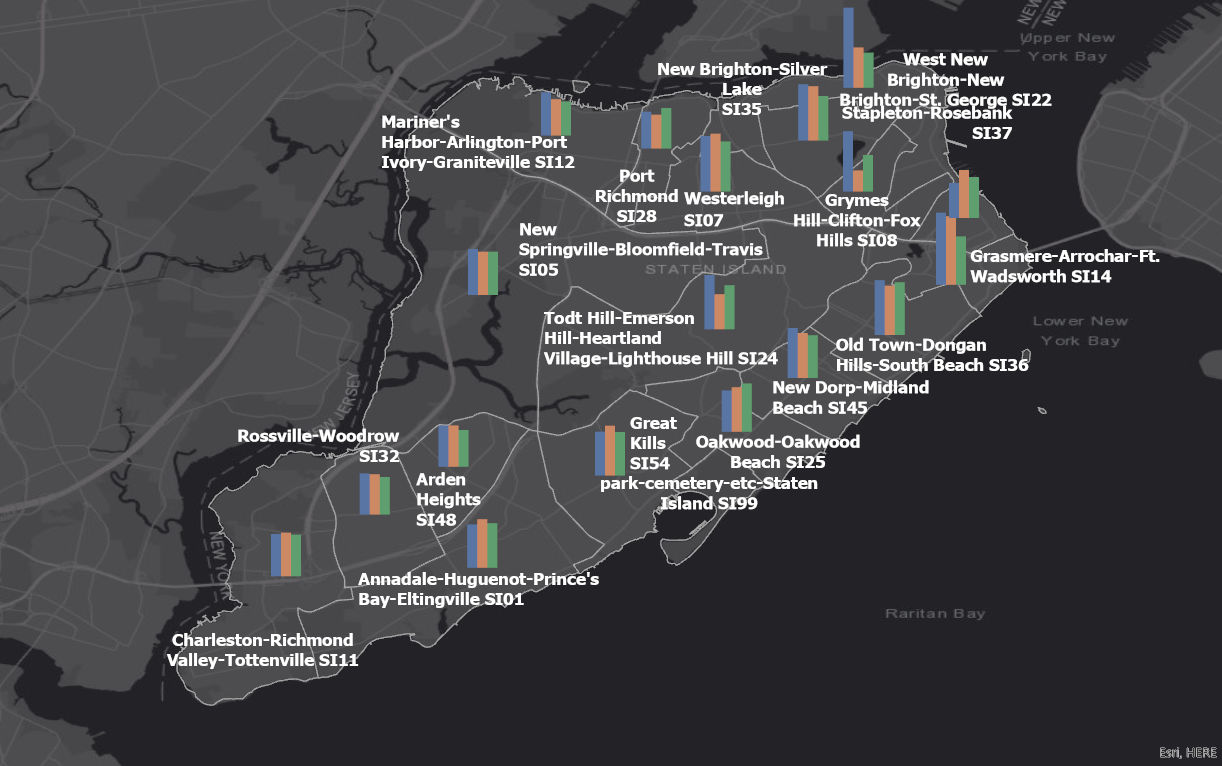

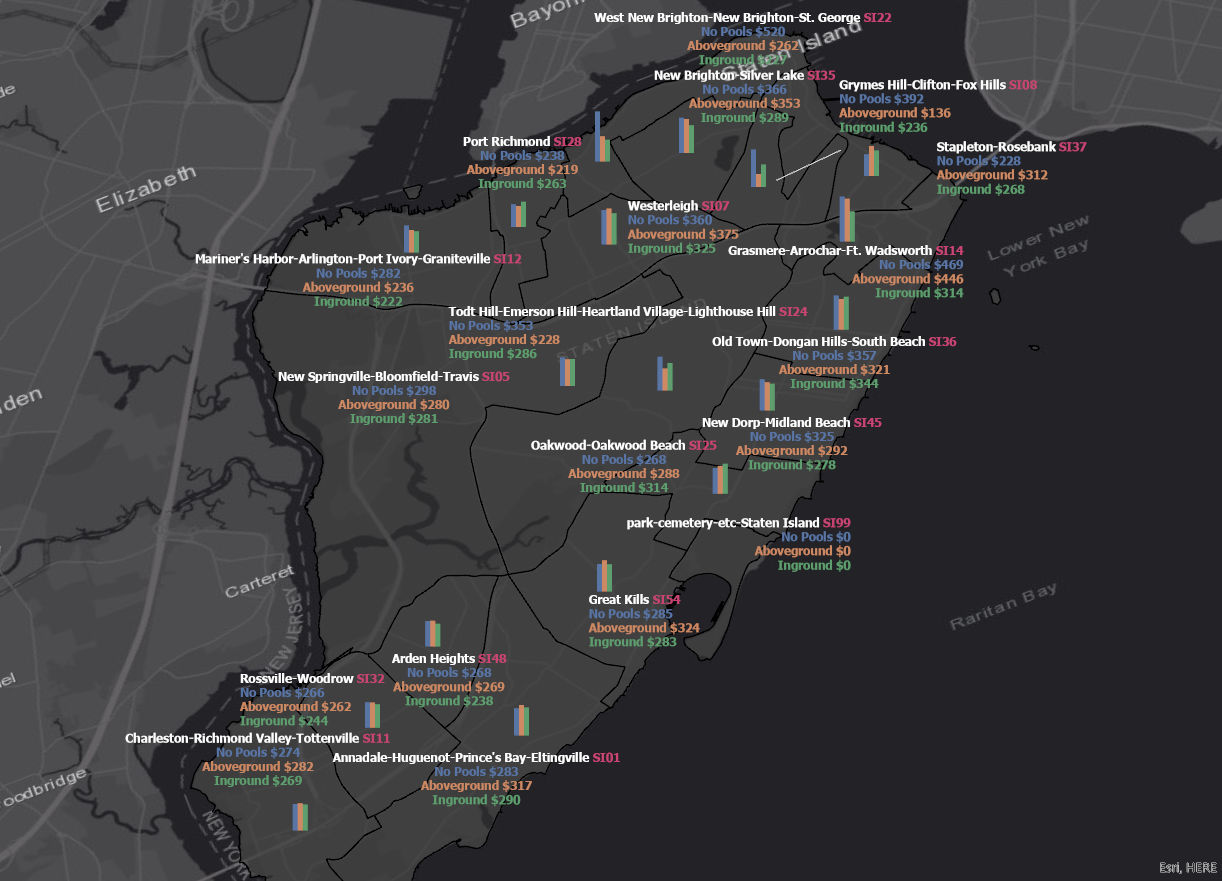

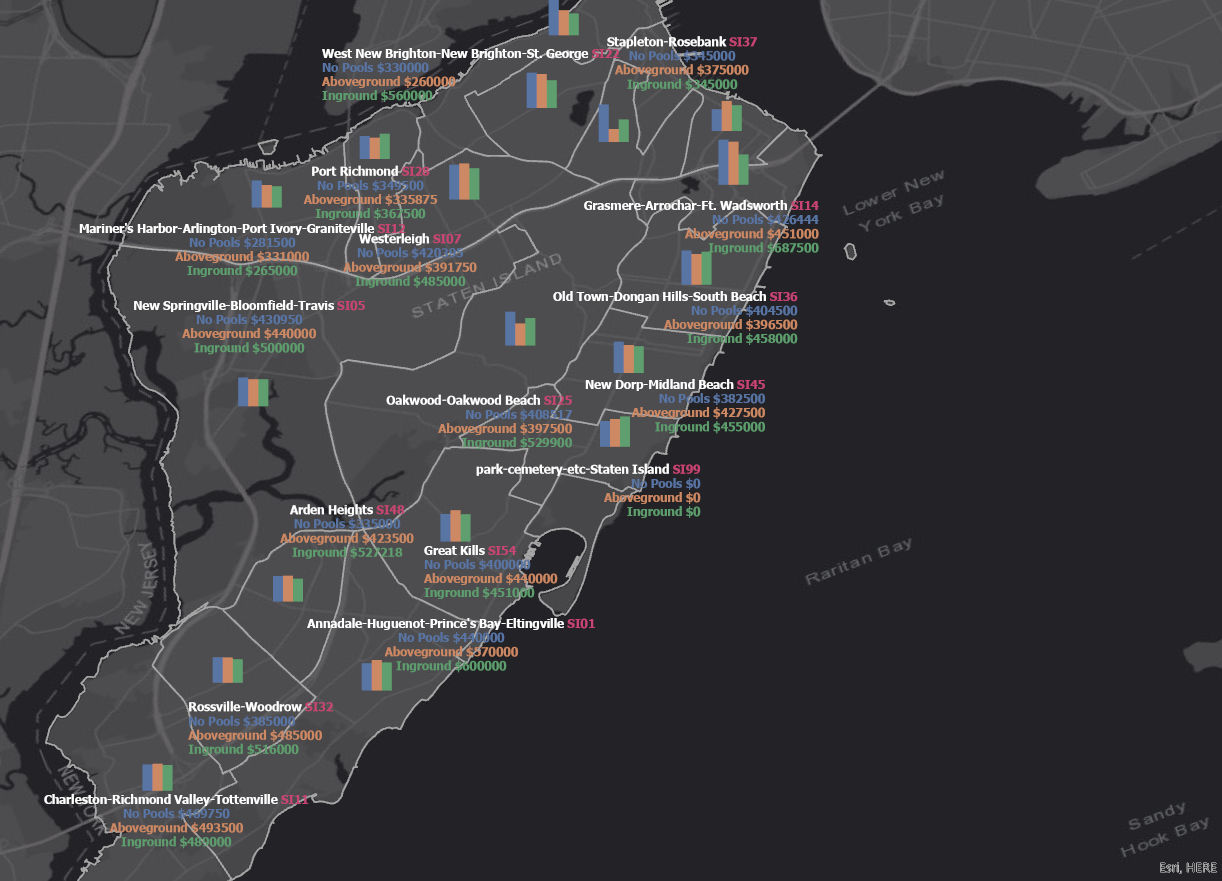

In [57]:
data = Pools
grps = pd.unique(data.Pools.values)
d_data = {grp:data['SPRICE15'][data.Pools == grp] for grp in grps}
k = len(pd.unique(data.Pools))
N = len(data.values)
n = data.groupby('Pools').size()[0]

In [58]:
from scipy import stats 

f, p =stats.f_oneway(d_data['aboveground'], d_data['inground'],d_data['nopool'])

In [45]:
f, p

(125.8406217031797, 3.1105159902573977e-53)

https://www.youtube.com/watch?v=YsdPFr8l2ac

https://www.youtube.com/watch?v=oOuu8IBd-yo

f statistic = 125.8406217031797

p statistic = 3.00 

Do test 

data 

Sample_aboveground = data[data.Pools =='aboveground']
Sample_inground = data[data.Pools =='inground']
Sample_nopool = data[data.Pools == 'nopool']

t_result = stats.ttest_ind(Sample_aboveground,Sample_inground)

<AxesSubplot:title={'center':'SP_per_SQFT'}, xlabel='Pools'>

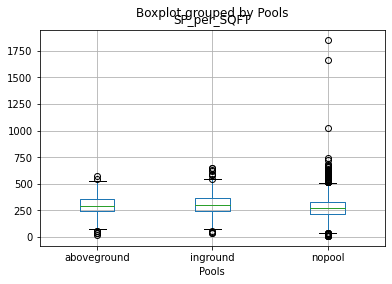

In [46]:
Pools.boxplot('SP_per_SQFT',by ='Pools')

## 1 way ANOVA

In [47]:
data = Pools
grps = pd.unique(data.Pools.values)
d_data = {grp:data['SP_per_SQFT'][data.Pools == grp] for grp in grps}
k = len(pd.unique(data.Pools))
N = len(data.values)
n = data.groupby('Pools').size()[0]

In [48]:
from scipy import stats 

f, p =stats.f_oneway(d_data['aboveground'], d_data['inground'],d_data['nopool'])

In [49]:
f, p

(9.799508167375425, 5.725163539284509e-05)

## Relationship between SalePrice, and Sale Price per SQFT 

In [50]:
colors = {'inground':'blue', 'aboveground':'red','nopool':'green' }

Text(0.5, 0.98, ' SalePrice and Sale Price per SQFT of properties with pools sold in SI,NY 2015 ')

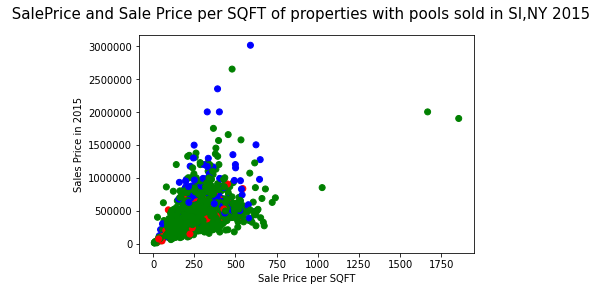

In [51]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.scatter(Pools.SP_per_SQFT,Pools.SPRICE15,c=Pools['Pools'].map(colors)) 
plt.ylabel('Sales Price in 2015')
plt.xlabel('Sale Price per SQFT')
plt.suptitle(' SalePrice and Sale Price per SQFT of properties with pools sold in SI,NY 2015 ', fontsize=15)  

In [52]:
Pools = Pools[Pools['Pools'] != 'nopool']

In [53]:
colors = {'inground':'blue', 'aboveground':'red','nopool':'yellow' }

Text(0.5, 0.98, ' SalePrice, and Sale Price per SQFT of properties with pools sold in SI,NY 2015 ')

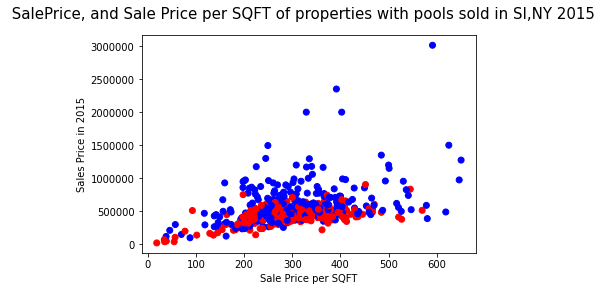

In [54]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.scatter(Pools.SP_per_SQFT,Pools.SPRICE15,c=Pools['Pools'].map(colors)) 
plt.ylabel('Sales Price in 2015')
plt.xlabel('Sale Price per SQFT')
plt.suptitle(' SalePrice, and Sale Price per SQFT of properties with pools sold in SI,NY 2015 ', fontsize=15)  

In [55]:
# http://www.biology.ualberta.ca/facilities/GIS/uploads/instructions/AVErrorMatrix.pdf

how to do an area matrix 

http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/error-matrix.html

https://www.youtube.com/watch?v=Ya7rbzGl8hM

https://pro.arcgis.com/en/pro-app/latest/help/analysis/image-analyst/accuracy-assessment.htm

https://www.amazon.com/Assessing-Accuracy-Remotely-Sensed-Data/dp/1420055127

In [ ]:
1.	Conduct an error assessment using an error matrix since this is a probablistic analysis.
2.	Put the above and below ground pools in a box and whisker plot to compare them.
3.	How do the distributions for all three pan out for price versus total square footage.
4.	It could be that price declines with pools not increases but you need to compare all three.
5.	Use a statistical test (s) to find out if differences are "real" 
